<a href="https://colab.research.google.com/github/IgorPisarenkoAlexandrovich/data-science-from-scratch_test/blob/master/Copy_of_TiFdD_PAC3_2526_Sep_CAT_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ús responsable de la intel·ligència artificial

A la UOC reconeixem el valor formatiu de la intel·ligència artificial (IA), però també els seus riscos si no s’utilitza amb ètica, criteri i transparència:
[https://www.uoc.edu/es/news/2024/posicionamento-de-la-uoc-sobre-la-inteligencia-artificial](https://www.uoc.edu/es/news/2024/posicionamento-de-la-uoc-sobre-la-inteligencia-artificial)

Durant aquest butlletí pots recolzar-te en eines d’IA, sempre amb l’objectiu de **reforçar la teva comprensió, corregir errors i enriquir l’aprenentatge**, però no per delegar el desenvolupament complet del treball.

### Pautes d’ús responsable

1. Utilitza la IA per **aclarir dubtes** sobre conceptes teòrics, llibreries o estructures de codi.
2. Fes-la servir per **entendre errors o explorar diferents enfocaments de resolució**.
3. Evita **copiar directament solucions completes** sense comprendre-les ni adaptar-les.
4. Si genera codi o idees, **analitza-les i comenta-les**, demostrant que les entens.
5. Mantén un ús **transparent i traçable**, explicant en quina mesura la IA ha contribuït al teu treball.

### Informe d’ús de la IA

En lliurar els exercicis, en aquest *notebook*, inclou una breu nota (3–5 línies) en què expliquis:

1. **Com has utilitzat la IA** durant el desenvolupament del butlletí.
2. **Quin tipus d’ajuda t’ha proporcionat** (per exemple, depurar codi, interpretar errors, plantejar visualitzacions).
3. **Un exemple de *prompt*** utilitzat i com vas integrar la resposta al teu treball.

> La IA ha de ser una **companya crítica** en el teu aprenentatge, que et permeti mantenir el **rigor acadèmic**, el pensament propi i la responsabilitat que la UOC promou com a institució.


# **Exercici 1 - Anàlisi i visualització de dades obertes en format JSON: el turisme nacional a Espanya (5/25 punts)**

[Datos.gob.es](https://datos.gob.es/) és el portal de dades obertes d’Espanya. El seu objectiu és oferir accés a [conjunts de dades públiques](https://datos.gob.es/es/catalogo/conjuntos-datos) per a la seva reutilització, fomentant la transparència, la innovació i el desenvolupament d’aplicacions basades en informació governamental.


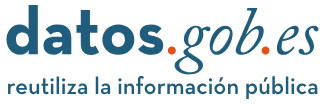

En particular, el conjunt de dades utilitzat en aquest exercici recull **[xifres sobre el turisme nacional](https://datos.gob.es/es/catalogo/ea0010587-numero-de-turistas-por-ccaa-y-provincia-de-destino-desagregados-por-provincia-de-origen-tmov-identificador-api-53267)**, publicades per l’Institut Nacional d’Estadística (INE).
Aquest conjunt inclou diferents nivells d’agregació, que permeten analitzar el flux turístic cap a les diferents Comunitats Autònomes i fins i tot a províncies concretes.


## Conceptes inicials de processament (Explicació prèvia)


Els conjunts de dades poden presentar-se en diferents formats. Actualment, un dels més comuns és JSON (JavaScript Object Notation), un format de text lleuger i fàcil de llegir que s’utilitza àmpliament per intercanviar informació entre aplicacions.
Python inclou una llibreria estàndard anomenada [`json`](https://docs.python.org/3/library/json.html), que permet treballar amb aquest tipus d’arxius de manera senzilla i eficient. Gràcies a ella, és possible convertir estructures de dades JSON en objectes natius de Python (com diccionaris o llistes) i viceversa, facilitant així la seva manipulació i anàlisi dins del llenguatge.


A continuació es mostra com descarregar i preparar el conjunt de dades en format JSON des de l’API de l’Institut Nacional d’Estadística (INE).


In [ ]:

# --------------------------------------------------------------------
# Carregar l'arxiu acabat de descarregar
# --------------------------------------------------------------------

# La funció open() obre l'arxiu local especificant la seva codificació (UTF-8).
# Després, json.load() converteix el contingut JSON en una estructura de dades
# de Python (normalment un diccionari o una llista).
# Això ens permet treballar amb les dades directament en l'entorn de Python.

# --------------------------------------------------------------------
# Desar una versió més llegible de l'arxiu JSON
# --------------------------------------------------------------------

# Molts arxius JSON vénen “compactats”, sense espais ni salts de línia.
# Per facilitar-ne la lectura, usem json.dump() amb els paràmetres:
# - ensure_ascii=False → manté els caràcters especials (til·les, ñ, etc.)
# - indent=4           → afegeix sagnia de 4 espais per formatar el contingut
# Desar una versió més llegible


In [ ]:
# Descarregar l'arxiu JSON des de l'endpoint de l'API de l'INE
# --------------------------------------------------------------------
# La comanda !wget fa una sol·licitud HTTP al servidor i desa el
# resultat en un arxiu local. En aquest cas, s'obté el conjunt
# de dades amb informació sobre el turisme nacional i es desa amb
# el nom "turismo-nacional-raw.json".

!wget "https://servicios.ine.es/wstempus/js/es/DATOS_TABLA/53267?tip=AM" -O "turismo-nacional-raw.json"

import json

# --------------------------------------------------------------------
# Carregar l'arxiu acabat de descarregar
# --------------------------------------------------------------------
# La funció open() obre l'arxiu local especificant la seva codificació (UTF-8).
# Després, json.load() converteix el contingut JSON en una estructura de dades
# de Python (normalment un diccionari o una llista).
# Això ens permet treballar amb les dades directament en l'entorn de Python.

with open("turismo-nacional-raw.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# --------------------------------------------------------------------
# Desar una versió més llegible de l'arxiu JSON
# --------------------------------------------------------------------

# Molts arxius JSON vénen “compactats”, sense espais ni salts de línia.
# Per facilitar-ne la lectura, usem json.dump() amb els paràmetres:
# - ensure_ascii=False → manté els caràcters especials (til·les, ñ, etc.)
# - indent=4           → afegeix sagnia de 4 espais per formatar el contingut
# Desar una versió més llegible
with open("turismo-nacional.json", "w", encoding="utf-8") as f:
   json.dump(data, f, ensure_ascii=False, indent=4)

--2025-12-09 07:49:46--  https://servicios.ine.es/wstempus/js/es/DATOS_TABLA/53267?tip=AM
Resolving servicios.ine.es (servicios.ine.es)... 195.254.149.35
Connecting to servicios.ine.es (servicios.ine.es)|195.254.149.35|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /wstempus/jsCache/es/DATOS_TABLA/53267?tip=AM [following]
--2025-12-09 07:49:47--  https://servicios.ine.es/wstempus/jsCache/es/DATOS_TABLA/53267?tip=AM
Reusing existing connection to servicios.ine.es:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘turismo-nacional-raw.json’

turismo-nacional-ra     [                <=> ]  33.51M   451KB/s    in 78s     

2025-12-09 07:51:08 (441 KB/s) - ‘turismo-nacional-raw.json’ saved [35134837]



Hi ha diverses pàgines web que permeten visualitzar i explorar arxius JSON de manera clara i estructurada.
Una de les més utilitzades és [jsonformatter.org](https://jsonformatter.org/), que mostra les dades en un format jeràrquic i llegible, facilitant la comprensió de la seva estructura i contingut.



### **Interpretació del JSON**

En aquest fragment de l’arxiu JSON podem observar com es representen les dades del flux del turisme nacional cap a Galícia.

Cada bloc d’aquest tipus descriu una combinació específica d’origen i destí turístic, juntament amb les sèries temporals de valors associats.

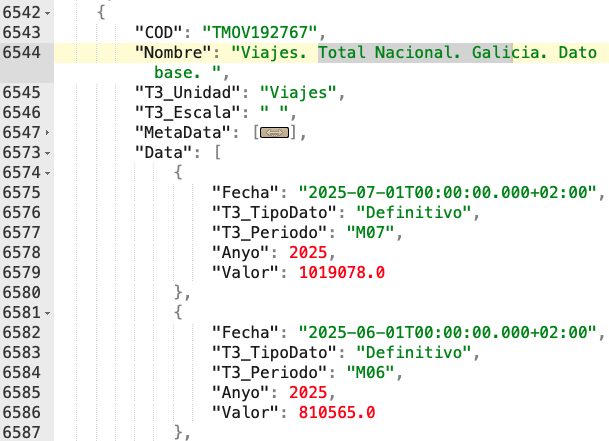



**Estructura i significat dels camps principals**

* COD → És un identificador únic que assigna l’INE a cada combinació d’origen, destí i tipus de dada.

* Nombre → Conté una cadena descriptiva que resumeix la informació continguda en aquesta entrada.

  La sintaxi general del camp "Nombre" segueix l’estructura:
  "Viajes. [ORIGEN]. [DESTINO]. Dato base."
  En aquest cas:
  * *Viajes* → indica la variable observada.
  * *ORIGEN* → indica l’origen dels turistes. Pot ser "Total Nacional" o una província concreta.
  * *DESTINO* → indica el destí. Pot ser una CCAA o una altra província concreta.
  * *Dato base* → descriu el tipus de dada o mesura publicada.

  ```
  Per exemple:  

  "Viajes. Total Nacional. Galicia. Dato base." → turistes procedents de tota Espanya que viatgen a Galícia.  

  "Viajes. Andalucía. Cataluña. Dato base." → turistes procedents d’Andalusia amb destí a Catalunya.  
  ```

* Data → Conté una llista de registres mensuals que inclouen els següents camps:

  * Fecha →	Data completa en format ISO (any, mes, dia, i zona horària).
  * T3_TipoDato →	Tipus de dada publicada, normalment “Definitivo” o “Provisional”.
  * T3_Periodo →	Període de referència (per exemple, “M07” = mes 7).
  * Anyo → Any de referència.
  * Valor → Valor numèric (nombre de turistes).


#### Explorant les dades del JSON:

A continuació es mostren exemples pràctics de com recórrer els registres de l’arxiu JSON per extreure informació concreta sobre els fluxos turístics entre diferents comunitats o províncies.
En aquest cas, els resultats s’imprimeixen per pantalla, mostrant el nombre de turistes registrats en cada mes de l’any 2025.


In [ ]:

json_object = []

# Llegim el JSON
with open('turismo-nacional.json', 'r') as file:
  json_object = json.load(file)

for item in json_object:

  # Recórrer les dades relacionades amb el flux nacional de turistes cap a Galícia
  # l'any 2025.

  # Origen = Total Nacional
  # Destí = Galícia

  if item['Nombre'] == 'Viajes. Total Nacional. Galicia. Dato base. ':
    data = item['Data']
    for element in data:

      if element['Anyo'] == 2025:
        print(
            'El flux de turistes cap a Galícia el 2025, al mes '
            + str(element['T3_Periodo'])
            + ' va ser de ' + str(element['Valor'])
        )

print('\n')

for item in json_object:

  # Recórrer les dades relacionades amb el flux nacional de turistes cap a Andalusia
  # l'any 2025. Només cal modificar lleugerament el valor del nom!

  # Origen = Total Nacional
  # Destí = Andalusia

  if item['Nombre'] == 'Viajes. Total Nacional. Andalucía. Dato base. ':
    data = item['Data']
    for element in data:

      if element['Anyo'] == 2025:
        print(
            'El flux de turistes cap a Andalusia el 2025, al mes '
            + str(element['T3_Periodo'])
            + ' va ser de ' + str(element['Valor'])
        )

print('\n')

for item in json_object:

  # Recórrer les dades relacionades amb el flux de turistes des d’Ourense cap a Andalusia
  # l'any 2025.

  # Origen = Ourense
  # Destí = Andalusia

  if item['Nombre'] == 'Viajes. Ourense. Andalucía. Dato base. ':
    data = item['Data']
    for element in data:

      if element['Anyo'] == 2025:
        print(
            'El flux de turistes des d’Ourense cap a Andalusia el 2025, al mes '
            + str(element['T3_Periodo'])
            + ' va ser de ' + str(element['Valor'])
        )



El flux de turistes cap a Galícia el 2025, al mes M09 va ser de 822235.0
El flux de turistes cap a Galícia el 2025, al mes M08 va ser de 1303858.0
El flux de turistes cap a Galícia el 2025, al mes M07 va ser de 1019078.0
El flux de turistes cap a Galícia el 2025, al mes M06 va ser de 810565.0
El flux de turistes cap a Galícia el 2025, al mes M05 va ser de 693648.0
El flux de turistes cap a Galícia el 2025, al mes M04 va ser de 753372.0
El flux de turistes cap a Galícia el 2025, al mes M03 va ser de 660917.0
El flux de turistes cap a Galícia el 2025, al mes M02 va ser de 647464.0
El flux de turistes cap a Galícia el 2025, al mes M01 va ser de 786907.0


El flux de turistes cap a Andalusia el 2025, al mes M09 va ser de 2802535.0
El flux de turistes cap a Andalusia el 2025, al mes M08 va ser de 3988705.0
El flux de turistes cap a Andalusia el 2025, al mes M07 va ser de 3401185.0
El flux de turistes cap a Andalusia el 2025, al mes M06 va ser de 3155370.0
El flux de turistes cap a Andalusia

De vegades convé preparar les dades abans d’analitzar-les o representar-les visualment. En el fragment de codi següent es mostra com estructurar la informació sobre el turisme nacional a Galícia dins d’un diccionari, una de les estructures de dades més versàtils de Python.


In [ ]:
import json

json_object = []

# Llegim el JSON
with open('turismo-nacional.json', 'r') as file:
  json_object = json.load(file)


# Emmagatzemem les dades del turisme a Galícia el 2025
turismo_galicia = dict()

for item in json_object:

  # Extreiem les dades relacionades amb el flux nacional de turistes cap a Galícia
  # el 2025. Les guardem en un diccionari.

  # El camp 'Nombre' conté totes les variables de la metadata
  if item['Nombre'] == 'Viajes. Total Nacional. Galicia. Dato base. ':
    data = item['Data']
    for element in data:
      if element['Anyo'] == 2025:
        periodo = element['T3_Periodo']
        valor = element['Valor']
        turismo_galicia[periodo] = valor

print(turismo_galicia)


{'M09': 822235.0, 'M08': 1303858.0, 'M07': 1019078.0, 'M06': 810565.0, 'M05': 693648.0, 'M04': 753372.0, 'M03': 660917.0, 'M02': 647464.0, 'M01': 786907.0}


D’altra banda, [`Matplotlib`](https://matplotlib.org/) és una llibreria de Python especialitzada en la creació de **gràfics i visualitzacions de dades**.

Permet representar la informació mitjançant gràfics de barres, línies, histogramas, diagrames de dispersió i molts altres tipus de visualitzacions.

És una eina molt utilitzada en ciència de dades, ja que ajuda a transformar valors numèrics en representacions visuals clares i fàcils d’interpretar.


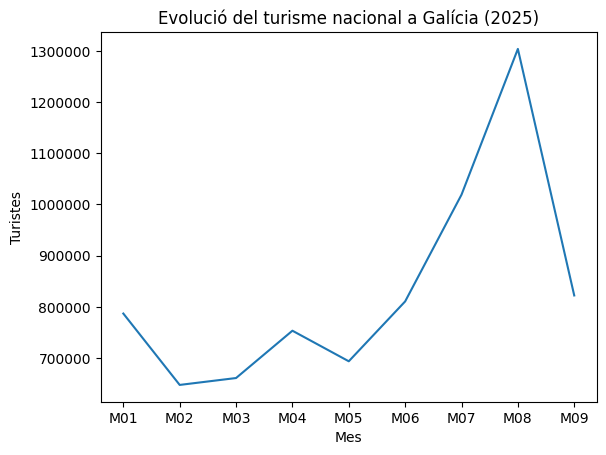

In [ ]:
import matplotlib.pyplot as plt

meses = sorted(turismo_galicia.keys())  # L'ordenem
valores = [turismo_galicia[mes] for mes in meses]

plt.plot(meses, valores)
plt.xlabel("Mes")
plt.ylabel("Turistes")
plt.title("Evolució del turisme nacional a Galícia (2025)")

# Per desactivar la notació científica
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.show()


## **Apartat 1 (2/25 punts)**

A partir del conjunt de dades proporcionat i després dels conceptes inicials, recull informació sobre el **turisme nacional a la Comunitat Valenciana i a la Comunitat de Madrid durant els mesos de 2024**.

Has de ser capaç d’obtenir una taula semblant a aquesta:


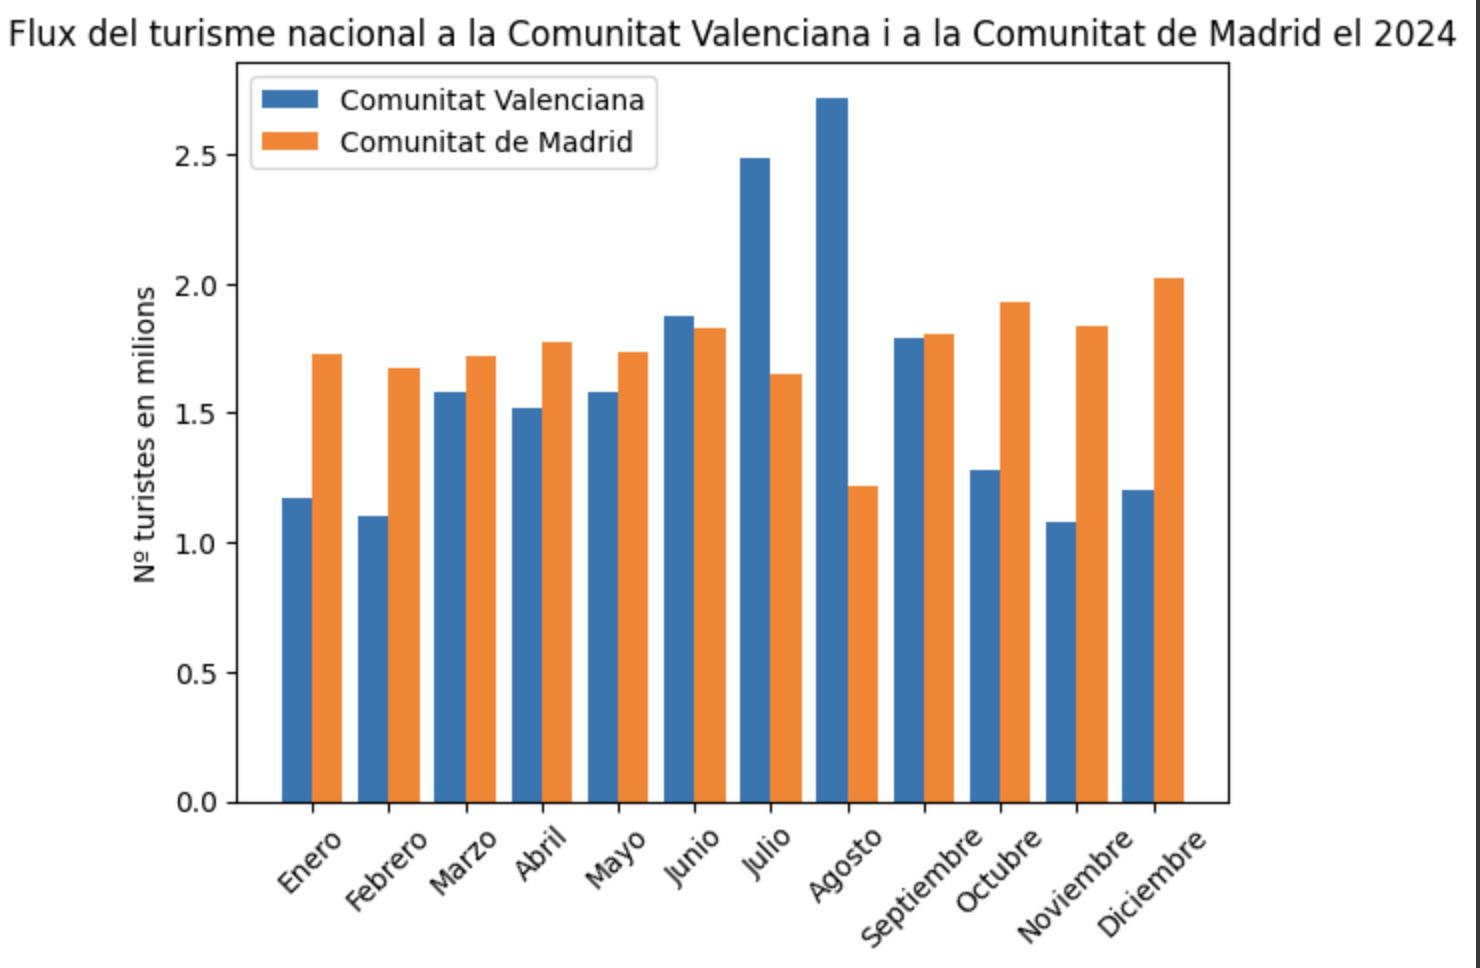

Intenta que el gràfic sigui el més semblant possible a l’anterior. Fixa’t en aquests aspectes:

* Apareixen el **nom complet dels mesos** i no el seu número. A més, les etiquetes han de ser **llegibles**.
* El **nombre de turistes apareix representat en milions**.
* La informació procedent del turisme a Madrid i València està **representada a continuació de l’altra**.
* El gràfic ha de tenir una **llegenda** informativa.

Pots recolzar-te en aquest [tutorial](https://www.geeksforgeeks.org/python/plotting-multiple-bar-charts-using-matplotlib-in-python/) per representar dues barres al mateix temps.


### **Solució**

In [ ]:
meses = {"M01":"Enero", "M02":"Febrero", "M03":"Marzo", "M04":"Abril",
         "M05":"Mayo", "M06":"Junio", "M07":"Julio", "M08":"Agosto",
         "M09": "Septiembre", "M10":"Octubre", "M11":"Noviembre",
         "M12":"Deciembre"}

def dict_fill(name_):
  res = dict()
  for item in json_object:
    if item['Nombre'] == name_:
      data = item['Data']
      for e in data:
        if e['Anyo'] == 2024:
          periode = e['T3_Periodo']
          valor = e['Valor']
          res[periode] = valor
  return res

tur_val = dict_fill('Viajes. Total Nacional. Comunitat Valenciana. Dato base. ')
tur_mad = dict_fill('Viajes. Total Nacional. Madrid, Comunidad de. Dato base. ')
print(tur_val)
print(tur_mad)

{'M12': 1200813.0, 'M11': 1077988.0, 'M10': 1282896.0, 'M09': 1793086.0, 'M08': 2720764.0, 'M07': 2483788.0, 'M06': 1873541.0, 'M05': 1578021.0, 'M04': 1516363.0, 'M03': 1583499.0, 'M02': 1102387.0, 'M01': 1169729.0}
{'M12': 2020240.0, 'M11': 1839647.0, 'M10': 1930841.0, 'M09': 1804258.0, 'M08': 1220040.0, 'M07': 1653571.0, 'M06': 1831272.0, 'M05': 1735848.0, 'M04': 1777328.0, 'M03': 1718895.0, 'M02': 1672221.0, 'M01': 1731103.0}


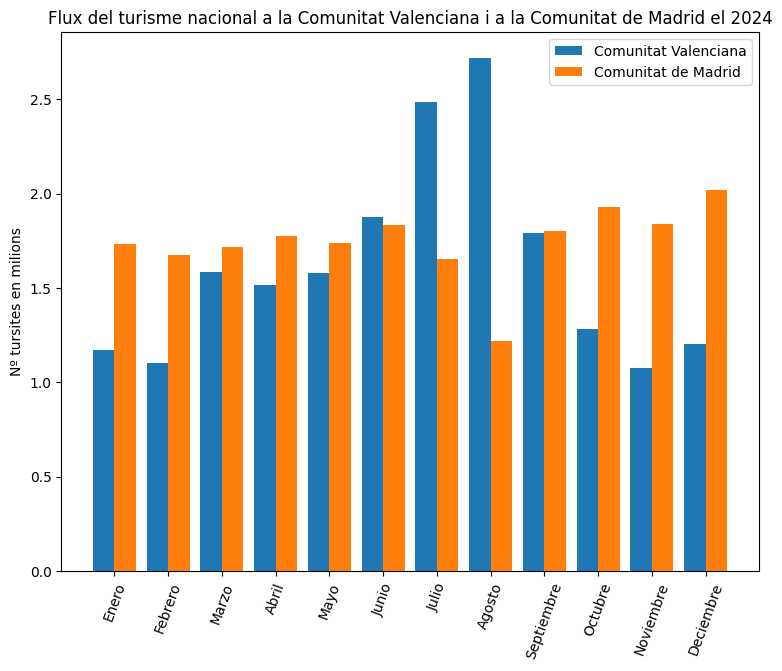

In [ ]:
import numpy as np


v_mad, v_val = [tur_mad[mes]/1000000 for mes in meses], [tur_val[mes]/1000000 for mes in meses]
#v_mad, v_val = v_mad[::-1], v_val[::-1]
#h = range(int(min(v_mad)), int(max(v_mad)))

w, x = 0.4, np.arange(len(meses))

plt.figure(figsize=(9,7))
plt.bar(x - w/2, v_val, w, label = 'Comunitat Valenciana')
plt.bar(x + w/2, v_mad, w, label = 'Comunitat de Madrid')
plt.xticks(rotation=70)

plt.xticks(range(0,12), meses.values())
plt.ylabel('Nº tursites en milions')
plt.title('Flux del turisme nacional a la Comunitat Valenciana i a la Comunitat de Madrid el 2024')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.legend()
plt.show()

## **Apartat 2 (1/25 punts)**

**Representa el flux del turisme des de Galícia cap a la Comunitat de Madrid l’any 2024.** Tingues en compte que en el conjunt de dades **no es mostren directament els fluxos entre Comunitats Autònomes.** Per això, hauràs d’analitzar la informació disponible i preparar-la adequadament.

A partir d’aquest anàlisi, hauràs de **generar un gràfic molt semblant a l’anterior, però adaptat a les noves dades**. En tot cas, la representació ha de conservar un format semblant al següent:


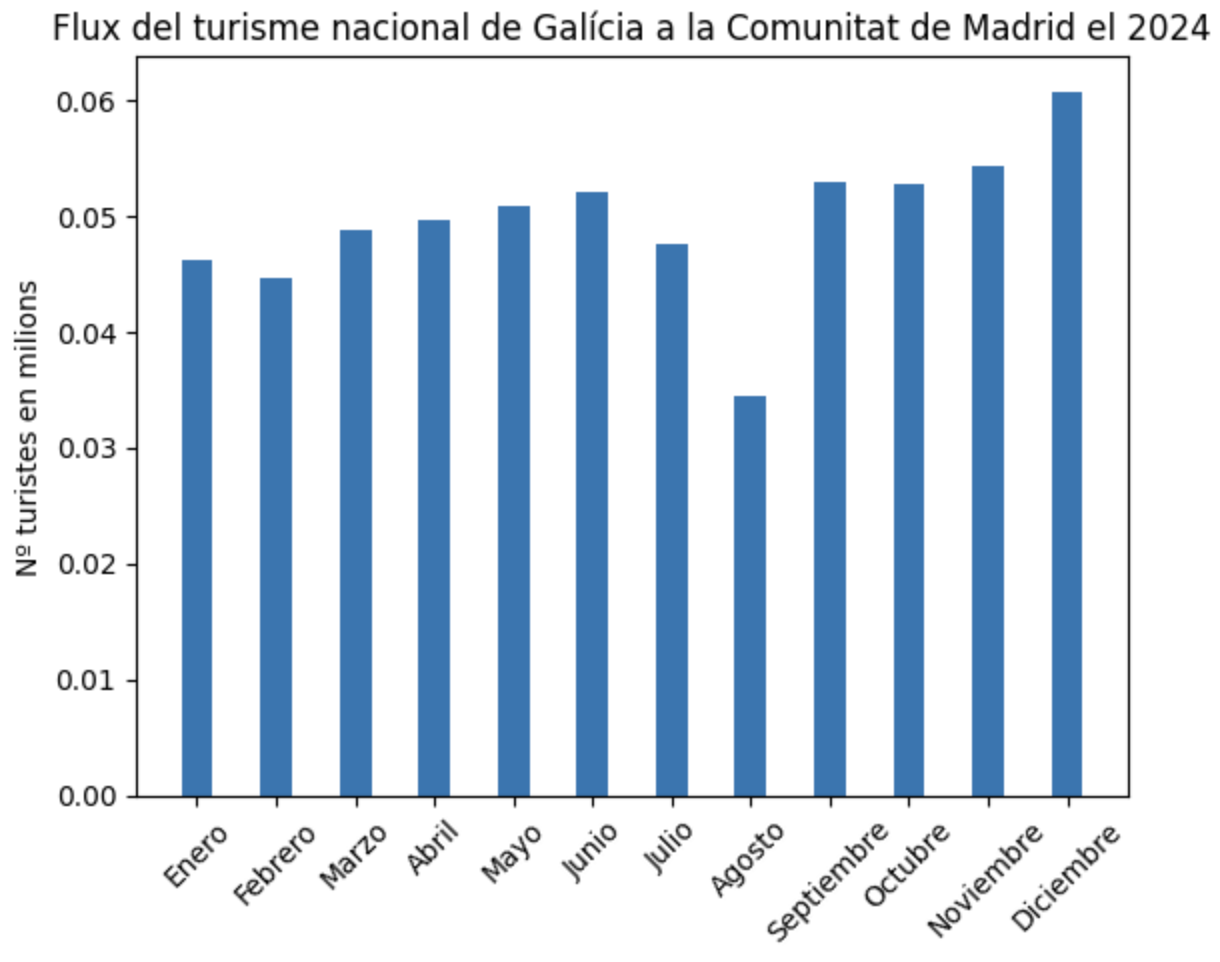

### **Solució**

In [ ]:
turismo_cor = dict()
for item in json_object:
  if item['Nombre'] == 'Viajes. Coruña, A. Madrid, Comunidad de. Dato base. ':
    data = item['Data']
    for element in data:
      if element['Anyo'] == 2024:
        periodo = element['T3_Periodo']
        valor = element['Valor']
        turismo_cor[periodo] = valor

print(turismo_cor)


{'M12': 45705.0, 'M11': 43342.0, 'M10': 40583.0, 'M09': 40071.0, 'M08': 24515.0, 'M07': 35246.0, 'M06': 40257.0, 'M05': 40344.0, 'M04': 38292.0, 'M03': 38722.0, 'M02': 34704.0, 'M01': 36322.0}


In [ ]:
turismo_pon = dict()
for item in json_object:
  if item['Nombre'] == 'Viajes. Pontevedra. Madrid, Comunidad de. Dato base. ':
    data = item['Data']
    for e in data:
      if e['Anyo'] == 2024:
        periode = e['T3_Periodo']
        valor = e['Valor']
        turismo_pon[periode] = valor

print(turismo_pon)

{'M12': 35809.0, 'M11': 32800.0, 'M10': 31989.0, 'M09': 31996.0, 'M08': 20220.0, 'M07': 29111.0, 'M06': 31663.0, 'M05': 30881.0, 'M04': 30702.0, 'M03': 30226.0, 'M02': 27089.0, 'M01': 27294.0}


In [ ]:
turismo_our = dict()
for item in json_object:
  if item['Nombre'] == 'Viajes. Ourense. Madrid, Comunidad de. Dato base. ':
    data = item['Data']
    for e in data:
      if e['Anyo'] == 2024:
        periode = e['T3_Periodo']
        valor = e['Valor']
        turismo_our[periode] = valor

print(turismo_our)

{'M12': 11597.0, 'M11': 10586.0, 'M10': 10120.0, 'M09': 9862.0, 'M08': 7019.0, 'M07': 8883.0, 'M06': 9681.0, 'M05': 9785.0, 'M04': 9139.0, 'M03': 8790.0, 'M02': 8179.0, 'M01': 8930.0}


In [ ]:
turismo_lugo = dict()
for item in json_object:
  if item['Nombre'] == 'Viajes. Lugo. Madrid, Comunidad de. Dato base. ':
    data = item['Data']
    for e in data:
      if e['Anyo'] == 2024:
        periode = e['T3_Periodo']
        valor = e['Valor']
        turismo_lugo[periode] = valor

print(turismo_lugo)

{'M12': 13302.0, 'M11': 10848.0, 'M10': 10663.0, 'M09': 10964.0, 'M08': 7151.0, 'M07': 9472.0, 'M06': 10692.0, 'M05': 10179.0, 'M04': 9701.0, 'M03': 9723.0, 'M02': 9272.0, 'M01': 9956.0}


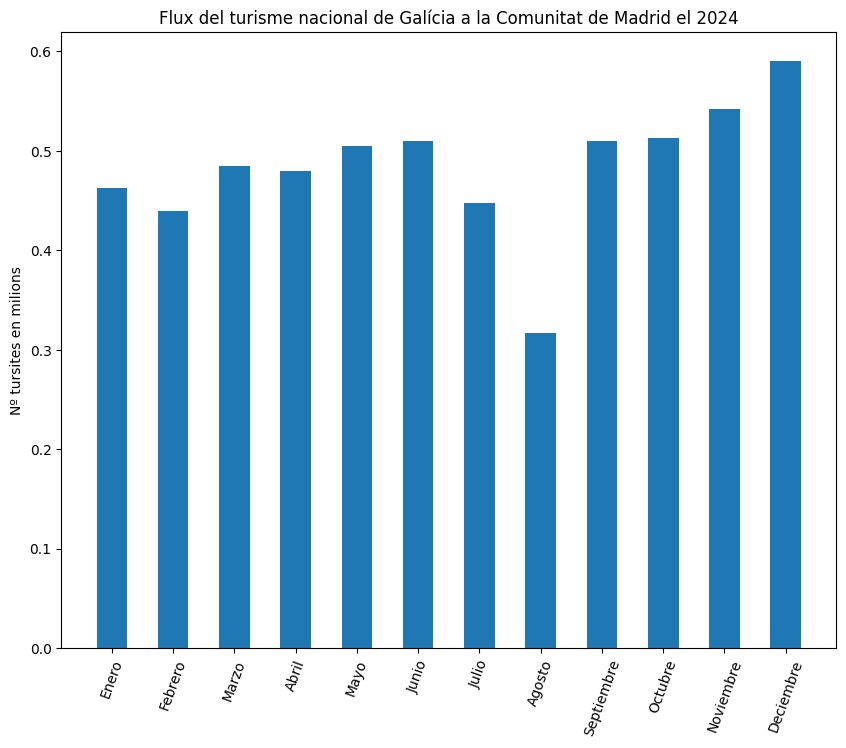

In [ ]:
#meses = sorted(turismo_cor.keys())  # L'ordenem
valores = [turismo_cor[mes]/100000 + turismo_lugo[mes]/100000  for mes in meses]
#+ turismo_our[mes]/100000 + turismo_pon[mes]/100000
#La gràfica aproximada
#Tot i que per a tota la galicia, els valors surten superiors als d'exemple
#valores = [turismo_cor[mes]/100000 + turismo_lugo[mes]/100000 + turismo_our[mes]/100000 + turismo_pon[mes]/100000 for mes in meses]

plt.figure(figsize=(10,8))
plt.bar(meses.values(), valores, width=0.5)

plt.xticks(rotation=70)
plt.xticks(range(0,12), meses.values())

plt.ylabel("Nº tursites en milions")
plt.title("Flux del turisme nacional de Galícia a la Comunitat de Madrid el 2024")


plt.show()


## **Apartat 3 (2/25 punts)**

En aquest apartat es proposa realitzar un **anàlisi lliure i exploratori del turisme nacional entre els anys 2020 i 2024**.
A diferència de l’exercici anterior, aquí tindràs més llibertat per decidir quin aspecte analitzar i com representar-lo. L’objectiu és posar en pràctica els coneixements adquirits sobre tractament, filtratge i visualització de dades JSON.

Pots triar l’enfocament que prefereixis, per exemple:

* Comparar l’evolució del turisme nacional entre diverses comunitats autònomes o províncies (les que triïs).
* Analitzar tendències interanuals (creixements, descensos o estabilitat del turisme).
* Calcular mitjanes o variacions anuals per destí o origen.
* Crear una visualització personalitzada que ajudi a interpretar els resultats.
* Detectar patrons estacionals o canvis rellevants en els fluxos turístics.

El teu treball ha d’incloure:

* El desenvolupament tècnic de l’anàlisi, mostrant el procés seguit (selecció, filtratge i tractament de dades, tipus de visualització emprada, etc.).
* Un breu informe de conclusions, on interpretis els resultats obtinguts i comentis els principals descobriments. **L’informe tindrà una extensió màxima de 15 línies.**

**Criteris d’avaluació**

* Claredat, profunditat i rigor de l’anàlisi i/o la visualització realitzada (grau de comprensió mostrat, solidesa en el tractament de les dades i pertinència de l’enfocament triat).
* Capacitat de síntesi en l’explicació (claredat i precisió a l’hora de resumir el procés en l’espai limitat).


In [ ]:
turismo_to = dict()
for item in json_object:
  if item['Nombre'] == "Viajes. Total Nacional. Barcelona. Dato base. ":
    data = item['Data']
    for element in data:
      if element['Anyo'] == 2020:
        periodo = element['T3_Periodo']
        valor = element['Valor']
        turismo_to[periodo] = valor

print(turismo_to)


turismo_from = dict()
for item in json_object:
  if item['Nombre'] == "Viajes. Barcelona. Total Nacional. Dato base. ":
    data = item['Data']
    for element in data:
      if element['Anyo'] == 2020:
        periodo = element['T3_Periodo']
        valor = element['Valor']
        turismo_from[periodo] = valor

print(turismo_from)

v_to, v_from = [turismo_to[m]/1000000 for m in meses], [turismo_from[m]/1000000 for m in meses]


{'M12': 570503.0, 'M11': 567061.0, 'M10': 820723.0, 'M09': 687236.0, 'M08': 470643.0, 'M07': 524713.0, 'M06': 386518.0, 'M05': 265515.0, 'M04': 268683.0, 'M03': 614447.0, 'M02': 904492.0, 'M01': 869357.0}
{'M12': 606746.0, 'M11': 457354.0, 'M10': 968009.0, 'M09': 1803817.0, 'M08': 2829054.0, 'M07': 1891492.0, 'M06': 916949.0, 'M05': 255593.0, 'M04': 229981.0, 'M03': 809745.0, 'M02': 1373420.0, 'M01': 1323138.0}


-----------------BCN 2020-----------------
Mitjana 	 FROM: 1.122 	 TO: 0.579
Desviació 	 FROM: 0.736 	 TO: 0.206
MIN 		 FROM: 0.23 	 TO: 0.266 
MAX 		 FROM: 2.829 	 TO: 0.904 


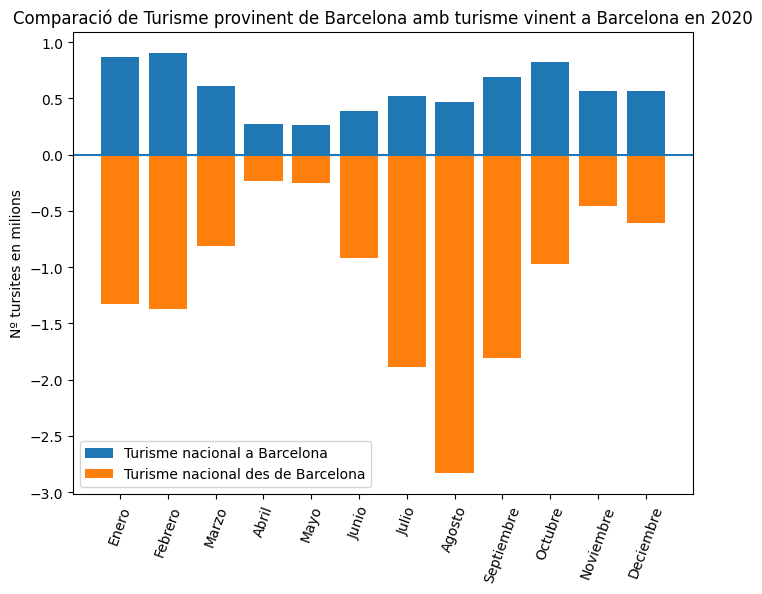

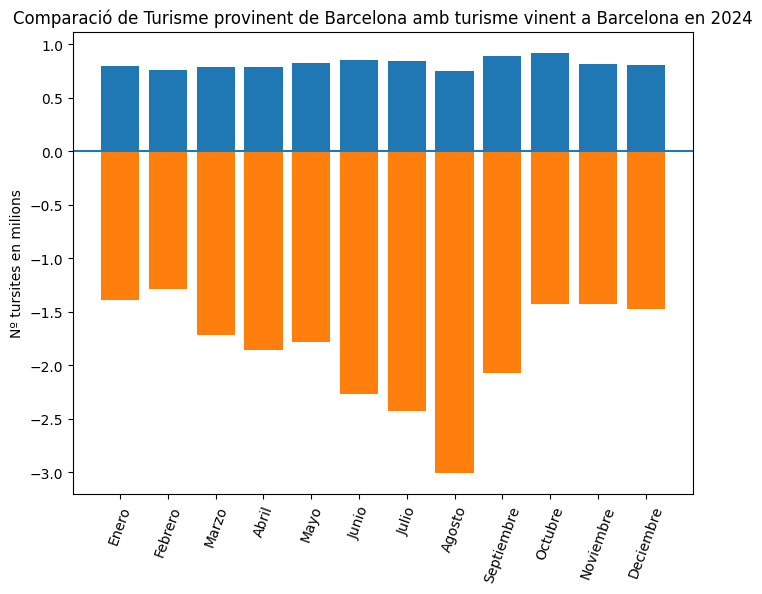

-----------------BCN 2024-----------------
Mitjana 	 FROM: 1.844 	 TO: 0.818
Desviació 	 FROM: 0.494 	 TO: 0.049
MIN 		 FROM: 1.288 	 TO: 0.746 
MAX 		 FROM: 3.005 	 TO: 0.918 


In [ ]:
#Per a demonstrar la diferència, es crea un bihistograma
plt.figure(figsize=(8,6))

plt.bar(meses.values(), v_to, label = 'Turisme nacional a Barcelona')
plt.bar(meses.values(), [-e for e in v_from], label = 'Turisme nacional des de Barcelona')

plt.axhline(0)
plt.xticks(rotation=70)
plt.xticks(range(0,12), meses.values())
plt.ylabel('Nº tursites en milions')
plt.title('Comparació de Turisme provinent de Barcelona amb turisme vinent a Barcelona en 2020')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.legend()

print("-----------------BCN 2020-----------------")
print(f"Mitjana \t FROM: {round(np.mean(v_from),3)} \t TO: {round(np.mean(v_to),3)}")
print(f"Desviació \t FROM: {round(np.std(v_from),3)} \t TO: {round(np.std(v_to),3)}")
print(f"MIN \t\t FROM: {round(np.min(v_from), 3)} \t TO: {round(np.min(v_to), 3)} ")
print(f"MAX \t\t FROM: {round(np.max(v_from), 3)} \t TO: {round(np.max(v_to), 3)} ")

turismo_to_2024 = dict()
for item in json_object:
  if item['Nombre'] == "Viajes. Total Nacional. Barcelona. Dato base. ":
    data = item['Data']
    for element in data:
      if element['Anyo'] == 2024:
        periodo = element['T3_Periodo']
        valor = element['Valor']
        turismo_to_2024[periodo] = valor

turismo_from_2024 = dict()
for item in json_object:
  if item['Nombre'] == "Viajes. Barcelona. Total Nacional. Dato base. ":
    data = item['Data']
    for element in data:
      if element['Anyo'] == 2024:
        periodo = element['T3_Periodo']
        valor = element['Valor']
        turismo_from_2024[periodo] = valor

v_to_2024, v_from_2024 = [turismo_to_2024[m]/1000000 for m in meses], [turismo_from_2024[m]/1000000 for m in meses]

#Per a demonstrar la diferència, es crea un bihistograma
plt.figure(figsize=(8,6))

plt.bar(meses.values(), v_to_2024, label = 'Turisme nacional a Barcelona')
plt.bar(meses.values(), [-e for e in v_from_2024], label = 'Turisme nacional des de Barcelona')

plt.axhline(0)
plt.xticks(rotation=70)
plt.xticks(range(0,12), meses.values())
plt.ylabel('Nº tursites en milions')
plt.title('Comparació de Turisme provinent de Barcelona amb turisme vinent a Barcelona en 2024')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

print("-----------------BCN 2024-----------------")
print(f"Mitjana \t FROM: {round(np.mean(v_from_2024),3)} \t TO: {round(np.mean(v_to_2024),3)}")
print(f"Desviació \t FROM: {round(np.std(v_from_2024),3)} \t TO: {round(np.std(v_to_2024),3)}")
print(f"MIN \t\t FROM: {round(np.min(v_from_2024), 3)} \t TO: {round(np.min(v_to_2024), 3)} ")
print(f"MAX \t\t FROM: {round(np.max(v_from_2024), 3)} \t TO: {round(np.max(v_to_2024), 3)} ")

##Conclusions estudi turisme Barcelona I/O 2020 i 2024

Vaig decidir comparar el flux de turisme amb Barcelona com a origen i destí en funció del mes de l'any.

Primerament vaig analitzar l'any 2020: de mitjana més gent va viatjar des de Barcelona que a Barcelona. Tanmateix, la categoria FROM presenta també els punts extrems, tant el mínim com el màxim. Aleshores, sobretot des de Juliol fins l'octubre, Barcelona va tenir més turistes nacionals visitant altres comunitats.

Després vaig analitzar l'any 2024, ja que l'any 2020 presentarà anomalies per la pandèmia del COVID-19. Excloent els mesos crítics del Març, Abril, Maig i Juny (quan les restriccions eren actives i agressives); la tendència és similar pels turistes nacionals tant provinents com visitant Barcelona. Els turistes FROM segueixen tenint la mitjana superior (1,84 comparat amb 0,82), major dispersió  (per desviació estàndard) també el màxim de 3 milions de persones. Però el mínim es representa per la part dels turistes visitant Barcelona.

# **Exercici 2 - Introducció al Web Scraping: extracció de dades de webs (7/25 pts)**

Actualment, gran part de la informació disponible a Internet no està pensada per ser descarregada o analitzada directament, sinó que es presenta dins de pàgines web dissenyades per a usuaris humans. Tot i això, els analistes i científics de dades solen necessitar accedir a aquesta informació de manera estructurada per poder-la processar, comparar o integrar en altres sistemes.

El web scraping sorgeix precisament com una tècnica que automatitza la recollida de dades des de pàgines web, permetent transformar el contingut visible (HTML) en dades organitzades i analitzables (per exemple, en format CSV, JSON o en un DataFrame de pandas).

#### Exemples d’ús real

* Extreure informació de catàlegs de productes (preus, títols, valoracions, disponibilitat…).
* Recollir dades d’ofertes de feina, vols o allotjaments per comparar tendències.
* Obtenir titulars o notícies per a anàlisi de text o mineria de dades.
* Monitoritzar canvis de preus o continguts en pàgines d’interès.

En aquest exercici realitzarem una extracció de dades des d’un parell de webs. La primera d’elles és una botiga online de llibres simulada, creada específicament amb finalitats educatives i de pràctica en web scraping:

[https://books.toscrape.com/index.html](https://books.toscrape.com/index.html)

Aquesta web és un lloc dissenyat per aprendre i experimentar amb tècniques d’extracció de dades sense infringir polítiques d’ús o drets d’autor.
La seva estructura està pensada per reproduir el funcionament d’una botiga real: inclou títols, preus, valoracions i disponibilitat de llibres, presentats de manera similar a qualsevol comerç electrònic.


## Conceptes inicials de Web Scraping (Explicació prèvia)

Vegem com fer una primera extracció d’un producte de la pàgina.


Els navegadors moderns ofereixen una opció anomenada [**Eines per a desenvolupadors**](https://medium.com/swlh/the-basics-of-chrome-devtools-4d69a102a699) que proporciona informació molt útil per entendre com funcionen les peticions web d’una pàgina. A Chrome, per exemple, podem accedir-hi anant a `Més eines > Eines per a desenvolupadors`.


El **primer** que hem de fer és **explorar breument la pàgina per entendre com s’estructura l’HTML**. Si inspeccionem el títol, veiem que per a cada llibre aquest element es troba dins d’una etiqueta `<h3>`.

Els elements semblen estar dins d’una llista ordenada `<ol>` que té la classe `row`.


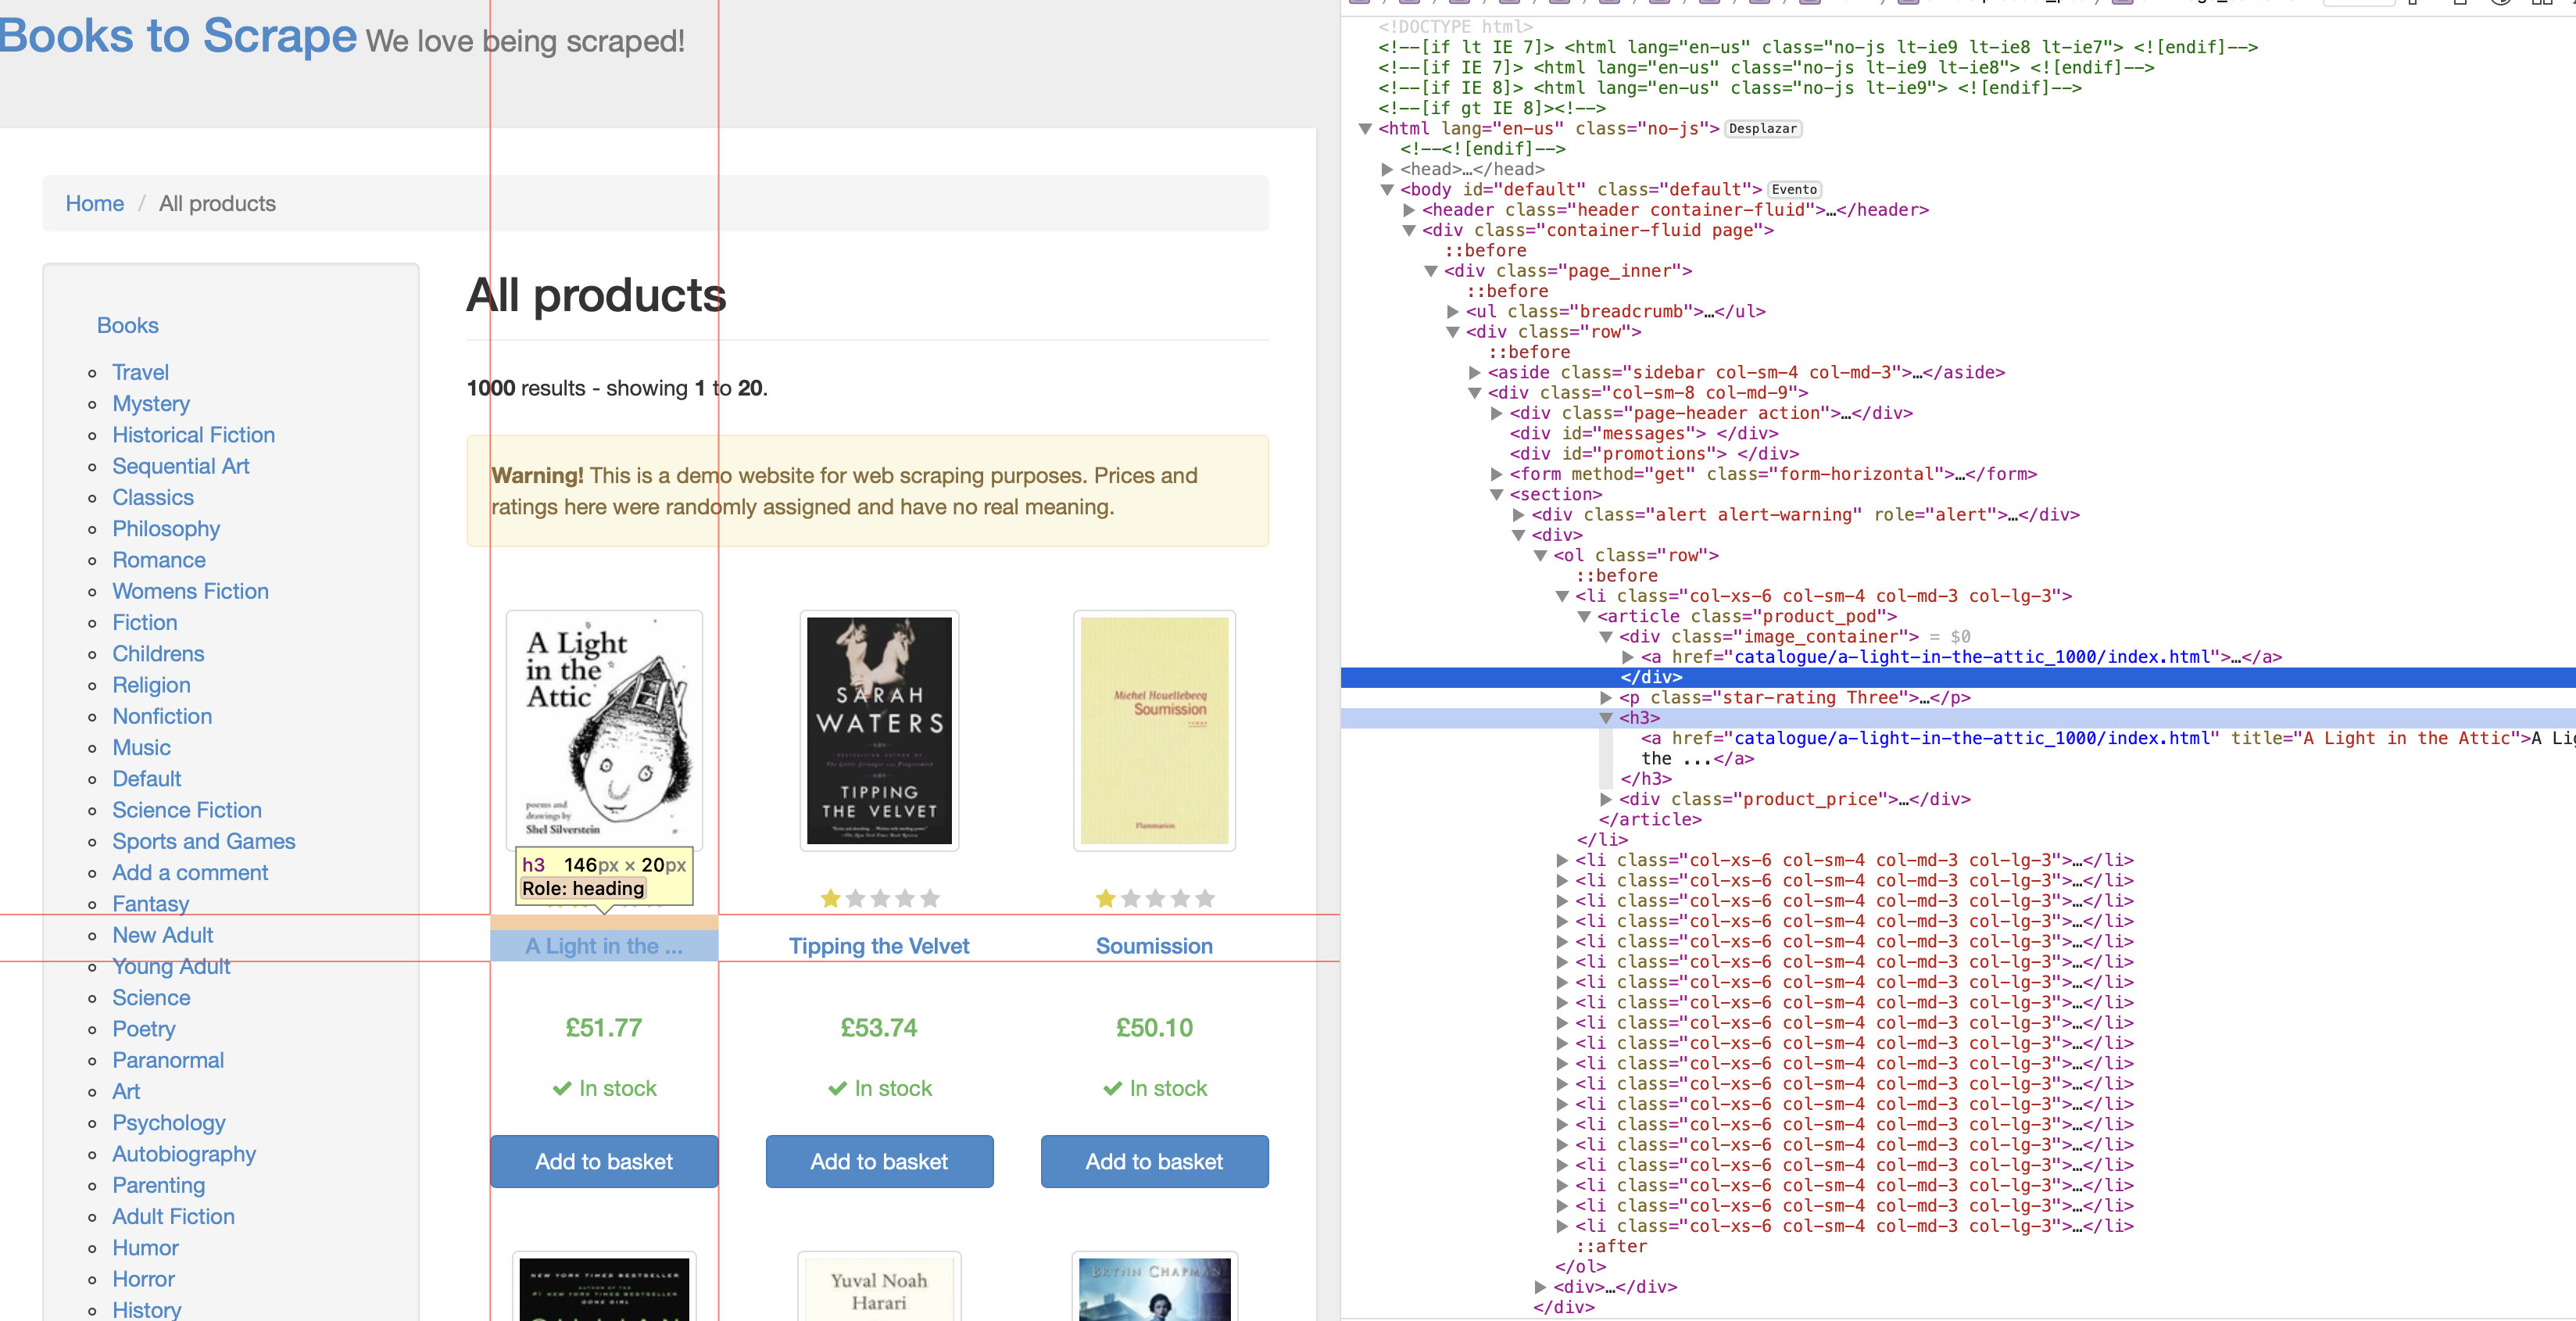

El **segon pas** és **obtenir** aquesta informació. Una de les llibreries més populars en Python per fer peticions a un servidor és [**`requests`**](https://requests.readthedocs.io/en/latest/). La podem instal·lar de la següent manera:


In [ ]:
!pip install requests

Per obtenir l’HTML, n’hi haurà prou amb fer una petició a la URL i guardar-ne la resposta.


In [ ]:
import requests

# Fem una petició a la pàgina principal de la botiga
response = requests.get('https://books.toscrape.com/index.html')

# Comprovem que la resposta ha estat correcta
if response.status_code == 200:
  content = response.content
  print(content)


b'<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:29" />\n        <meta name="description" content="" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shortcut icon" hre

El següent pas serà parsejar l’HTML; una altra llibreria molt popular és **`BeautifulSoup`**, que permet fer-ho. La instal·lem al nostre entorn:


In [ ]:
!pip install bs4

Podem consultar la documentació d’aquesta llibreria en el següent [enllaç](https://www.crummy.com/software/BeautifulSoup/bs4/doc/). Concretament, per obtenir el `<h3>` de cada producte:


In [ ]:
from bs4 import BeautifulSoup

# Parsejem el contingut HTML
soup = BeautifulSoup(content, 'html.parser')

# Cerquem la llista ordenada que conté els llibres
ordered_list = soup.find('ol', class_='row')

# Amb find_all() obtenim tots els elements de la llista
books = ordered_list.find_all('li')
for book in books:

  # Amb find() obtenim el primer element que compleixi els requisits
  title = book.find('h3')
  print(title.text)


A Light in the ...
Tipping the Velvet
Soumission
Sharp Objects
Sapiens: A Brief History ...
The Requiem Red
The Dirty Little Secrets ...
The Coming Woman: A ...
The Boys in the ...
The Black Maria
Starving Hearts (Triangular Trade ...
Shakespeare's Sonnets
Set Me Free
Scott Pilgrim's Precious Little ...
Rip it Up and ...
Our Band Could Be ...
Olio
Mesaerion: The Best Science ...
Libertarianism for Beginners
It's Only the Himalayas


No obstant això, veiem que **els títols no s’imprimeixen correctament i semblen tallats**. Si observem l’estructura HTML amb deteniment, veurem que el títol complet es troba a l’atribut `title` dins de l’enllaç a la pàgina de detalls de cada llibre.


In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(content, 'html.parser')


ordered_list = soup.find('ol', class_='row')
books = ordered_list.find_all('li')
for book in books:

  title = book.find('h3')
  link = title.find('a')

  if link:
    print(link['title'])

A Light in the Attic
Tipping the Velvet
Soumission
Sharp Objects
Sapiens: A Brief History of Humankind
The Requiem Red
The Dirty Little Secrets of Getting Your Dream Job
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
The Black Maria
Starving Hearts (Triangular Trade Trilogy, #1)
Shakespeare's Sonnets
Set Me Free
Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
Rip it Up and Start Again
Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991
Olio
Mesaerion: The Best Science Fiction Stories 1800-1849
Libertarianism for Beginners
It's Only the Himalayas


Cal tenir en compte que de vegades, quan fem web scraping, molta informació pot estar present però oculta dins de l’arbre HTML.


## **Apartat 1 (2/25 pts)**

Utilitzant les llibreries esmentades anteriorment, extreu un **llistat amb totes les categories que apareixen a la pàgina principal**. Per a cada categoria, has de mostrar el **nombre total de llibres que conté la categoria** i l’**enllaç a cadascuna d’elles**.

Aquestes categories haurien de poder imprimir-se per pantalla de la següent manera:

```
Name: Travel. Results: 11. URL: http://books.toscrape.com/catalogue/category/books/travel_2/index.html
Name: Mystery. Results: 32. URL: http://books.toscrape.com/catalogue/category/books/mystery_3/index.html
...
```


### **Solució**

In [ ]:
import requests

# Fem una petició a la pàgina principal de la botiga
response = requests.get('https://books.toscrape.com/index.html')

# Comprovem que la resposta ha estat correcta
if response.status_code == 200:
  content = response.content
  print(content)

b'<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:29" />\n        <meta name="description" content="" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shortcut icon" hre

In [ ]:
from bs4 import BeautifulSoup
preambule = 'http://books.toscrape.com/'
count = []
volume_books = []
names_genre = []
i = 0
soup = BeautifulSoup(content, 'html.parser')

lista_categories = soup.find('ul', class_ = 'nav nav-list')
categories = lista_categories.find_all('li')

for cat in categories:
  title = cat.find('a')
  name = title.get_text(strip = True)
  ref = title['href']
  temp = preambule + ref
  count.append(temp)
  names_genre.append(name)

  # Fem una petició a la pàgina principal de la botiga
  response = requests.get(temp)

# Comprovem que la resposta ha estat correcta
  if response.status_code == 200:
    content_aux = response.content
    soup_a = BeautifulSoup(content_aux, 'html.parser')
    lista_aux = soup_a.find('form', class_ = 'form-horizontal')
    contador = lista_aux.find('strong').get_text(strip = True)
    volume_books.append(contador)

  if ref:
      print(f"Name: {name}. Results: {contador}. URL: {temp} \n")





Name: Books. Results: 1000. URL: http://books.toscrape.com/catalogue/category/books_1/index.html 

Name: Travel. Results: 11. URL: http://books.toscrape.com/catalogue/category/books/travel_2/index.html 

Name: Mystery. Results: 32. URL: http://books.toscrape.com/catalogue/category/books/mystery_3/index.html 

Name: Historical Fiction. Results: 26. URL: http://books.toscrape.com/catalogue/category/books/historical-fiction_4/index.html 

Name: Sequential Art. Results: 75. URL: http://books.toscrape.com/catalogue/category/books/sequential-art_5/index.html 

Name: Classics. Results: 19. URL: http://books.toscrape.com/catalogue/category/books/classics_6/index.html 

Name: Philosophy. Results: 11. URL: http://books.toscrape.com/catalogue/category/books/philosophy_7/index.html 

Name: Romance. Results: 35. URL: http://books.toscrape.com/catalogue/category/books/romance_8/index.html 

Name: Womens Fiction. Results: 17. URL: http://books.toscrape.com/catalogue/category/books/womens-fiction_9/in

## **Apartat 2 (1/25 pts)**

Has de representar la informació recopilada a l’apartat anterior en un **gràfic de pastís** similar al següent:


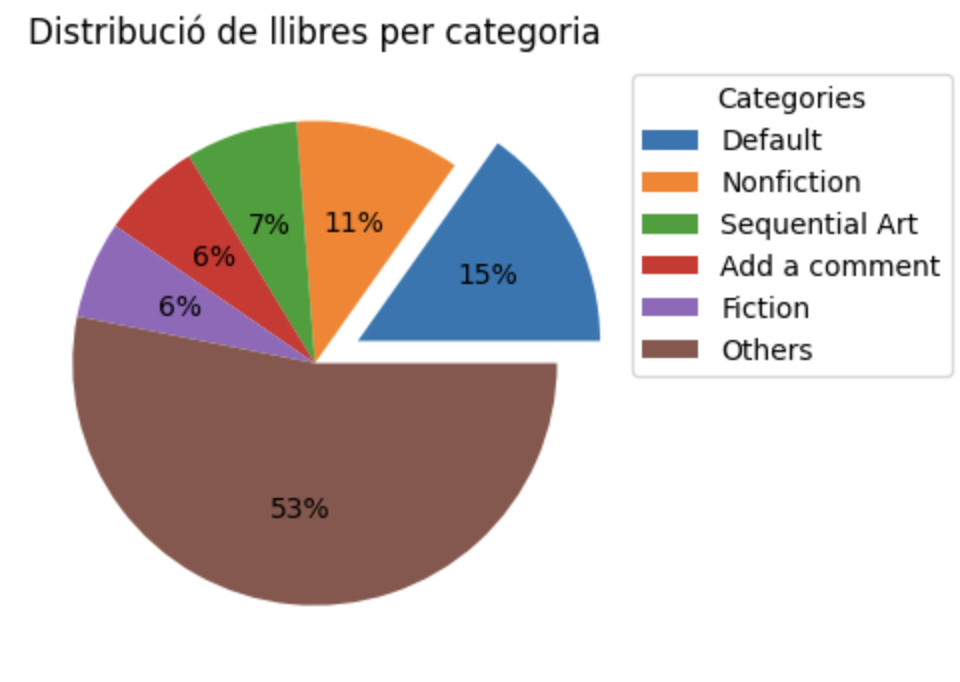

Cal tenir en compte el següent:

* Al gràfic apareixen representades les **5 primeres categories amb més llibres**. Les categories restants s’agrupen en una categoria especial anomenada **"Others"**.

* S’ha de **ressaltar la primera categoria amb més llibres**. Recorda que "Others" és una categoria especial i no es té en consideració.

* El gràfic ha de tenir una **llegenda**.

* S’han de mostrar els **percentatges** per a cada categoria.


### **Solució**

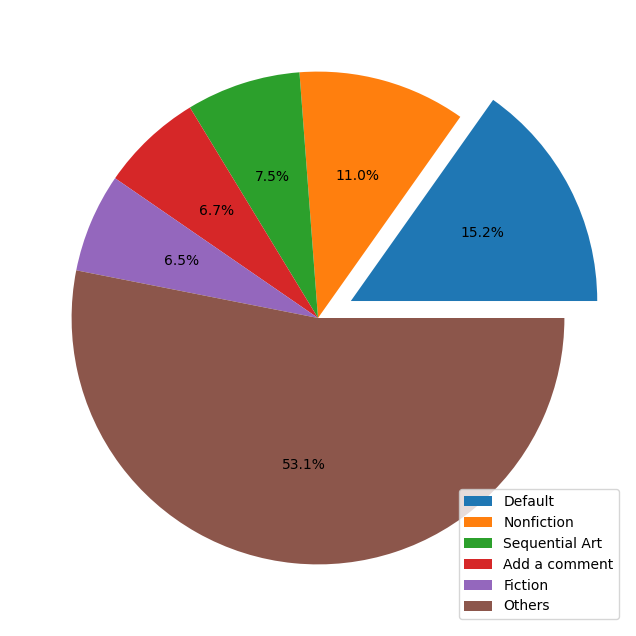

In [ ]:
import matplotlib

volume_books = [int(i) for i in volume_books]
res = dict(zip(names_genre, volume_books))

sorted_vl = sorted(res.items(), key= lambda x: x[1], reverse=True)

sum_others = sum(x for _, x in sorted_vl[6:])
top_five = sorted_vl[1:6]

explode = (0.15,0,0,0,0,0)
labels = [x for x, vl in top_five]
sizes = [vl for x, vl in top_five]

sizes.append(sum_others)
labels.append('Others')

fig, ax = plt.subplots(figsize=(10,8))
ax.pie(sizes, labels = None, explode= explode, autopct='%1.1f%%')

ax.legend(labels = labels)



## **Apartat 3 (2,5/25 pts)**

Analitza la següent [web](https://www.scrapingcourse.com/ecommerce/), que simula una plataforma de Ecommerce. L’objectiu serà **recollir tots els productes que ven la pàgina**. Per a cada producte cal extreure la següent informació:

* **Nom del producte:** `str`
* **Preu ($):** `float`. Si hi ha dos preus, per exemple `$25.00 $12.00`, ens quedem amb el més alt.
* **SKU:** `str`
* **Categoria:** `str`
* **Size:** `list`. Llista de mides, si està disponible. Si no, la llista serà buida.
* **Color:** `list`. Llista de colors, si està disponible. Si no, la llista serà buida.

**Cal desar-ho en un CSV amb el nom `products.csv`**. Per facilitar el guardat, definirem l’estructura dels productes.


In [34]:
import csv


class Product:

  columns = [
      'Product Name',
      'Price',
      'SKU',
      'Category',
      'Size',
      'Color'
  ]

  def __init__(
      self,
      product_name: str,
      price: float,
      sku: str,
      category: str,
      size: list,
      color: list
  ):
    self.product_name = product_name
    self.price = float(price)
    self.sku = sku
    self.category = category
    self.size = size
    self.color = color


  def return_row(self):
    return [
        self.product_name,
        self.price,
        self.sku,
        self.category,
        ', '.join(self.size),
        ', '.join(self.color)
    ]


def write_csv(products):

  with open('products.csv', 'w') as file:
    csv_writer = csv.writer(file)

    # Header
    csv_writer.writerow(products[0].columns)

    # Rows
    for product in products:
      csv_writer.writerow(product.return_row())

### **Solució**

In [35]:
import requests

# Fem una petició a la pàgina principal de la botiga
response = requests.get('https://www.scrapingcourse.com/ecommerce/')

# Comprovem que la resposta ha estat correcta
if response.status_code == 200:
  content_p = response.content
  print(content_p)

b'<!doctype html>\n<html lang="en-US">\n<head>\n<meta charset="UTF-8">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<link rel="profile" href="https://gmpg.org/xfn/11">\n<link rel="pingback" href="https://www.scrapingcourse.com/ecommerce/xmlrpc.php">\n<!-- Google tag (gtag.js) -->\n<script async src="https://www.googletagmanager.com/gtag/js?id=G-NZGD14H87G"></script>\n<script>\n\twindow.dataLayer = window.dataLayer || [];\n\tfunction gtag(){dataLayer.push(arguments);}\n\tgtag(\'js\', new Date());\n\tgtag(\'config\', \'G-NZGD14H87G\');\n</script>\n<title>Ecommerce Test Site to Learn Web Scraping &#8211; ScrapingCourse.com</title>\n<meta name=\'robots\' content=\'max-image-preview:large\' />\n<link rel=\'dns-prefetch\' href=\'//stats.wp.com\' />\n<link rel=\'dns-prefetch\' href=\'//www.scrapingcourse.com\' />\n<link rel=\'dns-prefetch\' href=\'//fonts.googleapis.com\' />\n<link rel="alternate" type="application/rss+xml" title="Ecommerce Test Site to Learn Web Scr

In [36]:
txt = 'https://www.scrapingcourse.com/ecommerce/'
pages = [txt + 'page/' + str(i) for i in range(2,13)]
pages.insert(0,txt)
pages

['https://www.scrapingcourse.com/ecommerce/',
 'https://www.scrapingcourse.com/ecommerce/page/2',
 'https://www.scrapingcourse.com/ecommerce/page/3',
 'https://www.scrapingcourse.com/ecommerce/page/4',
 'https://www.scrapingcourse.com/ecommerce/page/5',
 'https://www.scrapingcourse.com/ecommerce/page/6',
 'https://www.scrapingcourse.com/ecommerce/page/7',
 'https://www.scrapingcourse.com/ecommerce/page/8',
 'https://www.scrapingcourse.com/ecommerce/page/9',
 'https://www.scrapingcourse.com/ecommerce/page/10',
 'https://www.scrapingcourse.com/ecommerce/page/11',
 'https://www.scrapingcourse.com/ecommerce/page/12']

In [37]:
from bs4 import BeautifulSoup

l_prod = []

#productes = lista_productes.find_all('li')
for i in pages:
  response = requests.get(i)

# Comprovem que la resposta ha estat correcta
  if response.status_code == 200:
    content_p = response.content
    print(content_p)
  soup = BeautifulSoup(content_p,'html.parser')
  productes = soup.find_all('a', class_ = 'woocommerce-LoopProduct-link woocommerce-loop-product__link')
  for prod in productes :
    ref_p = prod.get('href')
    l_prod.append(ref_p)

b'<!doctype html>\n<html lang="en-US">\n<head>\n<meta charset="UTF-8">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<link rel="profile" href="https://gmpg.org/xfn/11">\n<link rel="pingback" href="https://www.scrapingcourse.com/ecommerce/xmlrpc.php">\n<!-- Google tag (gtag.js) -->\n<script async src="https://www.googletagmanager.com/gtag/js?id=G-NZGD14H87G"></script>\n<script>\n\twindow.dataLayer = window.dataLayer || [];\n\tfunction gtag(){dataLayer.push(arguments);}\n\tgtag(\'js\', new Date());\n\tgtag(\'config\', \'G-NZGD14H87G\');\n</script>\n<title>Ecommerce Test Site to Learn Web Scraping &#8211; ScrapingCourse.com</title>\n<meta name=\'robots\' content=\'max-image-preview:large\' />\n<link rel=\'dns-prefetch\' href=\'//stats.wp.com\' />\n<link rel=\'dns-prefetch\' href=\'//www.scrapingcourse.com\' />\n<link rel=\'dns-prefetch\' href=\'//fonts.googleapis.com\' />\n<link rel="alternate" type="application/rss+xml" title="Ecommerce Test Site to Learn Web Scr

In [51]:
res = []

for i in l_prod:
  response = requests.get(i)
  if response.status_code == 200:
    content_p_c = response.content
  soup = BeautifulSoup(content_p_c, 'html.parser')

  pr = soup.find('h1', class_ = 'product_title')
  product_name = pr.get_text(strip = True)
  print(product_name)

  pric = soup.find('p', class_='price')
  product_price_temp = pric.get_text(strip = True)
  product_price = product_price_temp[1:3] #write it into class as float
  print(product_price)

  sk = soup.find('span', class_ = 'sku_wrapper')
  sku_temp = sk.get_text(strip = True)
  sku = sku_temp[4:]
  print(sku)

  cat = soup.find('span', class_ = 'posted_in')
  category_temp = cat.get_text(strip = True)
  category = category_temp[9:]
  print(category)

  siz = soup.find('tr', class_ = 'woocommerce-product-attributes-item woocommerce-product-attributes-item--attribute_size')
  size_temp = siz.get_text(strip=True) if siz else ""
  size_temp = size_temp[4:]
  sizes = list(size_temp.replace(" ", "").split(','))
  print(sizes)

  col = soup.find('tr', class_ = 'woocommerce-product-attributes-item woocommerce-product-attributes-item--attribute_color')
  col_temp = col.get_text(strip=True) if col else ""
  col_temp = col_temp[5:]
  colores = list(col_temp.replace(" ", "").split(','))
  print(colores)

  res.append(Product(product_name,product_price, sku, category, sizes, colores))


  print('-----------------------------------------------------------------')

Abominable Hoodie
69
MH09
Hoodies & Sweatshirts
['XS', 'S', 'M', 'L', 'XL']
['Blue', 'Green', 'Red']
-----------------------------------------------------------------
Adrienne Trek Jacket
57
WJ08
Erin Recommends|Clothing
['XS', 'S', 'M', 'L', 'XL']
['Gray', 'Orange', 'Purple']
-----------------------------------------------------------------
Aeon Capri
48
WP07
Performance Fabrics|Clothing
['28', '29']
['Black', 'Blue', 'Orange']
-----------------------------------------------------------------
Aero Daily Fitness Tee
24
MS01
Tees
['XS', 'S', 'M', 'L', 'XL']
['Black', 'Brown', 'Yellow']
-----------------------------------------------------------------
Aether Gym Pant
74
MP11
Erin Recommends|Clothing
['32', '33', '34', '36']
['Blue', 'Brown', 'Green']
-----------------------------------------------------------------
Affirm Water Bottle
7.
24-UG06
Fitness Equipment
['']
['']
-----------------------------------------------------------------
Aim Analog Watch
45
24-MG04
Watches
['']
['']
----

In [52]:
res[-1].return_row()

['Zoltan Gym Tee',
 29.0,
 'MS06',
 'Tees',
 'XS, S, M, L, XL',
 'Blue, Green, Yellow']

In [53]:
write_csv(res)

## **Apartat 4 (1,5/25 pts)**

A continuació, **representa les peces que existeixen de cada color**. Pots representar un gràfic similar al següent:


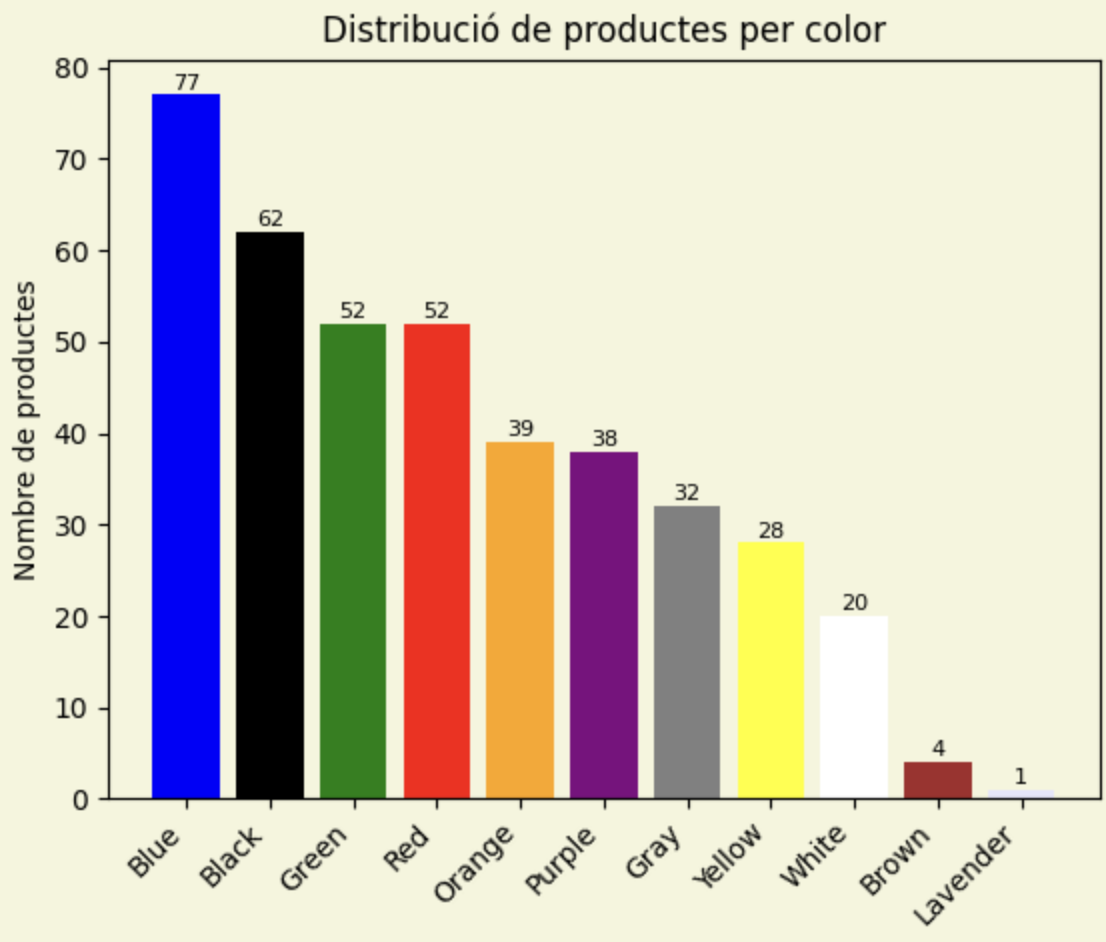

Cal tenir en compte el següent:

* Han d’aparèixer **tots els colors representats**: de major a menor ocurrència.

* A sobre de cada barra ha d’aparèixer el **nombre total d’elements d’aquest color**.

* Els **colors de les barres haurien de correspondre amb el color**.

* El color de fons s’hauria de canviar per **ressaltar el color blanc**, ja que per defecte a Matplotlib el color de fons és blanc.


### **Solució**

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('products.csv')


Product Name  Price   SKU                      Category  \
0       Abominable Hoodie   69.0  MH09         Hoodies & Sweatshirts   
1    Adrienne Trek Jacket   57.0  WJ08      Erin Recommends|Clothing   
2              Aeon Capri   48.0  WP07  Performance Fabrics|Clothing   
3  Aero Daily Fitness Tee   24.0  MS01                          Tees   
4         Aether Gym Pant   74.0  MP11      Erin Recommends|Clothing   

              Size                 Color  
0  XS, S, M, L, XL      Blue, Green, Red  
1  XS, S, M, L, XL  Gray, Orange, Purple  
2           28, 29   Black, Blue, Orange  
3  XS, S, M, L, XL  Black, Brown, Yellow  
4   32, 33, 34, 36    Blue, Brown, Green

In [88]:
colores = df["Color"].dropna().str.split(',').explode().str.strip()
contador_colores = colores.value_counts()
contador_idx = contador_colores.index.tolist()

cols = [i.lower() for i in contador_idx]

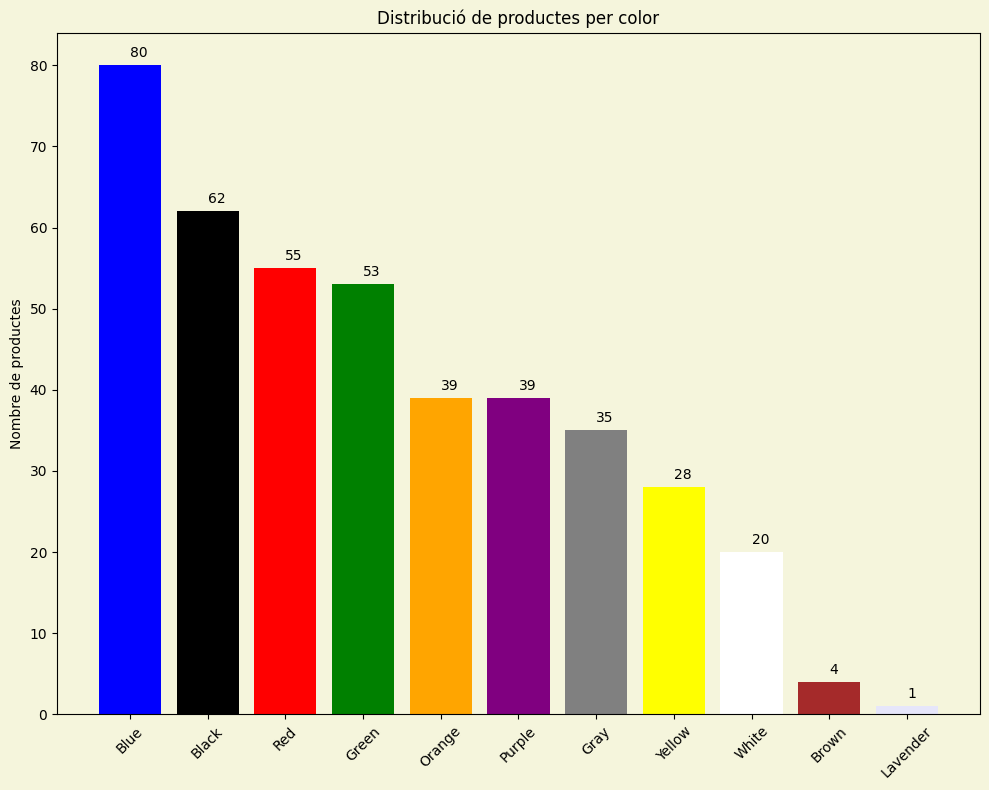

In [89]:
plt.figure(facecolor='beige', figsize=(10,8))
plt.bar(contador_idx, contador_colores, color = cols)

ax = plt.gca()
ax.set_facecolor('beige')

for i, c in zip(plt.bar(contador_idx, contador_colores, color = cols), contador_colores.values):
  h = i.get_height()
  ax.text(i.get_x()+i.get_width()/2, h+1, str(c))

plt.xticks(rotation = 45)
plt.title('Distribució de productes per color')
plt.ylabel('Nombre de productes')

plt.tight_layout()
plt.show()

# **Exercici 3 - Accés a dades obertes mitjançant API (6,5/25 pts)**

Una API (Application Programming Interface) és un mecanisme que permet a diferents aplicacions comunicar-se entre si per sol·licitar o intercanviar informació. La seva funció és estandarditzar la manera com un programa pot accedir a les dades o serveis d’un altre sistema. Les APIs de dades públiques són interfícies que permeten accedir de manera estructurada i automatitzada a la informació que ofereixen organismes i institucions.

En aquest apartat s’explorarà com treballar amb una API de dades públiques, atenent a les seves característiques principals, les consideracions tècniques necessàries i exemples de possibles aplicacions pràctiques que aprofiten la informació disponible.


## Conceptes inicials sobre el consum d’APIs (Explicació prèvia)

Una API (Application Programming Interface) ofereix diferents endpoints, que són adreces URL dissenyades per accedir a recursos o dades concretes d’un servei.
Cada endpoint defineix una ruta específica i retorna un tipus d’informació determinat, normalment en format JSON.

En consumir una API, s’estableixen peticions cap a aquests endpoints i es processen les respostes per integrar les dades obtingudes en aplicacions o fluxos de treball.

Explorarem algun exemple d’API i veurem com fer peticions.


### Weather-API

Es tracta d’una API d’exemple que proporciona informació sobre el temps d’una ciutat. Podem trobar el codi, així com la seva documentació, en el següent enllaç a [GitHub](https://github.com/robertoduessmann/weather-api).

Un endpoint és una adreça específica d’una API a la qual fem una petició per obtenir dades. En aquesta API, l’endpoint principal és:

```
GET /weather/{city}
```

Substituint {city} pel nom d’una ciutat (per exemple, /weather/Madrid), l’API retorna en format JSON informació sobre el temps d’aquesta ciutat.


In [ ]:
import requests


# Petició a l'endpoint per a la ciutat de Madrid
response = requests.get('http://goweather.xyz/weather/Madrid')
if response.status_code == 200:
  print('Madrid:')
  print(response.json())


# Petició a l'endpoint per a la ciutat de Barcelona
response = requests.get('http://goweather.xyz/weather/Barcelona')
if response.status_code == 200:
  print('Barcelona:')
  print(response.json())


Barcelona:
{'temperature': '20 °C', 'wind': '15 km/h', 'description': 'Sunny', 'forecast': [{'day': '1', 'temperature': '20 °C', 'wind': '13 km/h'}, {'day': '2', 'temperature': '19 °C', 'wind': '15 km/h'}, {'day': '3', 'temperature': ' °C', 'wind': '15 km/h'}]}


### [JSONPlaceholder](https://jsonplaceholder.typicode.com/)

És una API de pràctica, pensada per aprendre a fer peticions i provar com funcionen. No utilitza dades reals, sinó dades d’exemple.

Disposa de diversos endpoints, que permeten treballar amb diferents recursos:

* Publicacions: `https://jsonplaceholder.typicode.com/posts`
  Torna una llista de publicacions d’exemple.

* Comentaris: `https://jsonplaceholder.typicode.com/comments`
  Mostra els comentaris disponibles.

* Usuaris: `https://jsonplaceholder.typicode.com/users`
  Torna una llista d’usuaris d’exemple.


In [ ]:
import requests

# Obtenim totes les publicacions
response = requests.get('https://jsonplaceholder.typicode.com/posts')
if response.status_code == 200:
    print('Publicacions: ')
    print(response.json())

# Obtenim tots els comentaris
response = requests.get('https://jsonplaceholder.typicode.com/comments')
if response.status_code == 200:
    print('Comentaris: ')
    print(response.json())

# Obtenim tots els usuaris
response = requests.get('https://jsonplaceholder.typicode.com/users')
if response.status_code == 200:
    print('Usuaris: ')
    print(response.json())


Publicacions: 
[{'userId': 1, 'id': 1, 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}, {'userId': 1, 'id': 2, 'title': 'qui est esse', 'body': 'est rerum tempore vitae\nsequi sint nihil reprehenderit dolor beatae ea dolores neque\nfugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis\nqui aperiam non debitis possimus qui neque nisi nulla'}, {'userId': 1, 'id': 3, 'title': 'ea molestias quasi exercitationem repellat qui ipsa sit aut', 'body': 'et iusto sed quo iure\nvoluptatem occaecati omnis eligendi aut ad\nvoluptatem doloribus vel accusantium quis pariatur\nmolestiae porro eius odio et labore et velit aut'}, {'userId': 1, 'id': 4, 'title': 'eum et est occaecati', 'body': 'ullam et saepe reiciendis voluptatem adipisci\nsit amet autem assumenda provident rerum cu

També és habitual en les APIs enviar paràmetres. Un paràmetre és una dada addicional que afegim a la petició per filtrar o personalitzar la resposta. Per exemple, el codi següent retorna les publicacions de l’usuari amb ID 1.


In [ ]:
import requests

# Obtenim les publicacions de l'usuari amb ID 1
params = {
    'userId': 1
}

response = requests.get('https://jsonplaceholder.typicode.com/posts', params=params)
if response.status_code == 200:
  print('Publicacions de l\'usuari 1')
  print(response.json())


Publicacions de l'usuari 1
[{'userId': 1, 'id': 1, 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}, {'userId': 1, 'id': 2, 'title': 'qui est esse', 'body': 'est rerum tempore vitae\nsequi sint nihil reprehenderit dolor beatae ea dolores neque\nfugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis\nqui aperiam non debitis possimus qui neque nisi nulla'}, {'userId': 1, 'id': 3, 'title': 'ea molestias quasi exercitationem repellat qui ipsa sit aut', 'body': 'et iusto sed quo iure\nvoluptatem occaecati omnis eligendi aut ad\nvoluptatem doloribus vel accusantium quis pariatur\nmolestiae porro eius odio et labore et velit aut'}, {'userId': 1, 'id': 4, 'title': 'eum et est occaecati', 'body': 'ullam et saepe reiciendis voluptatem adipisci\nsit amet autem assumenda provid

### Documentació

Moltes APIs que trobem a Internet tenen documentació disponible. En ella s’explica quins endpoints existeixen, quins paràmetres es poden utilitzar i quin tipus de respostes retorna l’API. Aquesta informació és fonamental per saber com construir correctament les peticions i entendre les dades que rebem. A més, sol incloure exemples pràctics que faciliten l’aprenentatge i la integració en projectes reals.


## **Apartat 1** (2/25 pts)

La següent API, [**RestCountries**](https://restcountries.com/#endpoints-translation), és un servei gratuït que proporciona informació detallada de tots els països del món, incloent dades com la capital, la població, els idiomes, la moneda i la bandera.

En aquest exercici hauràs de centrar-te únicament en els països del **continent europeu**. Per això, consulta la [documentació oficial](https://restcountries.com/#endpoints-translation) de l’API i construeix una petició que et retorni només alguns camps concrets de cada país, sense necessitat de carregar tota la informació disponible.

Pista: A RestCountries (v3.1) pots sol·licitar només Europa usant l’endpoint de regió:
https://restcountries.com/v3.1/region/europe

La teva tasca consisteix a extreure les següents dades de cada país europeu:

- Nom del país: `str`.
- Codi del país: `str` (`ES`, `FR`, `PT`...).
- Població: `int`.
- Moneda: llista amb el nom i el símbol de les monedes (ex. `Euro (€)`).
- Idiomes: llista amb tots els idiomes d’un país.

Es valorarà positivament una solució eficient, en què no sigui necessari processar tot l’objecte JSON complet, sinó que la pròpia API filtri i retorni únicament els camps requerits mitjançant paràmetres en la sol·licitud.  
Un cop obtingudes les dades, hauràs de mostrar per pantalla la informació de cada país europeu en el format indicat i exportar-la a un fitxer CSV amb el nom `european_countries.csv`.

La sortida per pantalla ha de ser semblant a la següent:

```
Name: Lithuania.  Code: LT.  Population: 2794700.  Languages: Lithuanian.  Currencies: Euro (€).
Name: Croatia.  Code: HR.  Population: 4047200.  Languages: Croatian.  Currencies: Euro (€).
Name: Denmark.  Code: DK.  Population: 5831404.  Languages: Danish.  Currencies: Danish krone (kr).
...
```

### **Solució**

## **Apartat 2** (1,5/25 ptos)

Fins ara hem vist com consumir dades des d’APIs, però de vegades no n’hi ha prou amb veure aquestes dades en taules: també volem visualitzar-les en un mapa. Per això utilitzarem [`Folium`](https://python-visualization.github.io/folium/latest/), una llibreria de Python que ens permet crear mapes interactius que s’obren al navegador, on podem desplaçar-nos, fer zoom o superposar informació.

[`Branca`](https://python-visualization.github.io/branca/) és una altra llibreria, que s’encarrega de la part visual: ens permet crear escales de color, llegendes i altres elements gràfics. Gràcies a Branca, podrem assignar un color diferent a cada país en funció de les seves dades, per exemple, la seva població. Així, no només tindrem un mapa “bonic”, sinó que a més cada color transmetrà informació real.

**L’objectiu serà construir un mapa que ens permeti explorar visualment la població de cada país europeu: com més fosc sigui el color, més habitants tindrà. Hem d’utilitzar el camp "Population" que vam extreure prèviament a l’apartat 1.**


Podem instal·lar `Folium` i `Branca` al nostre entorn de la manera següent:


In [ ]:
!pip install folium
!pip install branca

### Com funciona Branca?

Amb Branca podem crear mapes de colors. Aquests mapes permeten generar un color en funció d’un valor que li proporcionem. El següent codi serveix per il·lustrar millor el seu funcionament.


In [ ]:
import branca.colormap as cm

# Creem un colormap lineal del blau al vermell, amb valors entre 0 i 100
colormap = cm.LinearColormap(
    colors=['blue', 'red'],
    vmin=0,
    vmax=100
)

# Mostrem el colormap a pantalla
# El colormap de Branca ens proporciona un color específic per al valor que li passem
print("Color HEX per al valor 90: " + colormap(90))
print("Color HEX per al valor 80: " + colormap(80))
print("Color HEX per al valor 20: " + colormap(20))
print("Color HEX per al valor 10: " + colormap(10))

colormap


Color HEX per al valor 90: #e60019ff
Color HEX per al valor 80: #cc0033ff
Color HEX per al valor 20: #3300ccff
Color HEX per al valor 10: #1900e6ff


### Com funciona Folium?

El següent codi permet generar les fronteres de cada país pertanyent a la Unió Europea a partir d’un GeoJSON, un tipus d’arxiu que representa informació geogràfica (punts, línies, polígons) en estructura JSON.

Si vols aprofundir més sobre aquest format, pots consultar la documentació oficial a [geojson.org](https://geojson.org/).


In [ ]:
import folium
import branca.colormap as cm
import requests

def representar_europa():
    # URL de l'arxiu GeoJSON amb les fronteres dels països europeus
    # (NUTS nivell 0 = països, any 2024, projecció EPSG:4326)
    url = "https://gisco-services.ec.europa.eu/distribution/v2/nuts/geojson/NUTS_RG_03M_2024_4326_LEVL_0.geojson"

    # --- Descàrrega del GeoJSON ---
    response = requests.get(url)
    if response.status_code == 200:
        gj = response.json()
    else:
        print("Error en descarregar el GeoJSON")
        return None

    # --- Creació del mapa base ---
    # Centrem el mapa a Europa (latitud ~54.5, longitud ~15.3)
    # 'Cartodb Positron' és un estil de mapa clar i net, ideal per visualitzacions temàtiques
    m = folium.Map(location=[54.5, 15.3], zoom_start=4, tiles="Cartodb Positron")

    # --- Visualització de les fronteres ---
    # Afegim la capa del GeoJSON al mapa
    # Cada país es dibuixa amb un contorn negre, farcit groc clar (#FFEA00),
    # i una lleu transparència (fillOpacity)
    folium.GeoJson(
        gj,
        style_function=lambda feature: {
            "fillColor": feature["properties"].get("COLOR", "#FFEA00"),
            "color": "black",
            "weight": 0.5,
            "fillOpacity": 0.6
        },
        # Tooltip: en passar el ratolí sobre un país, es mostren el codi i nom
        tooltip=folium.GeoJsonTooltip(
            fields=["NUTS_ID", "NUTS_NAME"],
            aliases=["Codi", "Nom"]
        )
    ).add_to(m)

    # Retorna el mapa (interactiu en notebooks i navegadors)
    return m

# Crida a la funció per generar i visualitzar el mapa
representar_europa()


Si analitzem el GeoJSON, veiem que està dividit en múltiples elements que anomenarem **“feature”**. Una **feature** dins d’un arxiu GeoJSON és simplement un element geogràfic individual. Cada feature té dues parts principals:

* **Geometry**, que descriu la seva forma al mapa (per exemple, un polígon que marca les fronteres d’un país).
* **Properties**, que són les dades associades a aquest element (com el nom del país o el seu codi).


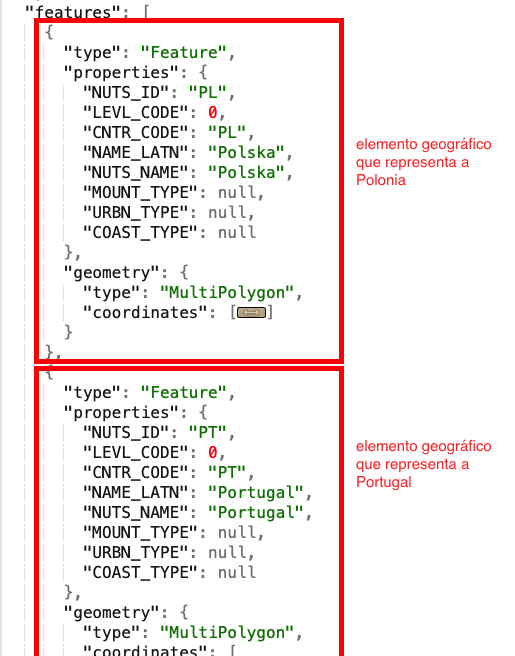

A Folium, quan representem el GeoJSON, el paràmetre style_function permet assignar un color a cadascun d’aquests elements geogràfics. Al codi anterior, la funció:

```
style_function=lambda feature: {
            "fillColor": feature["properties"].get("COLOR", '#FFEA00'),
            "color": "black",
            "weight": 0.5,
            "fillOpacity": 0.6
      },
```

pinta cada element geogràfic amb les dades de "COLOR" que tingui a les seves propietats. El problema és que, com hem vist, cap element té aquesta propietat.

### Objectiu de l’apartat

Després d’aprendre com funcionen Folium i Branca, l’objectiu d’aquest apartat és combinar ambdues llibreries per representar visualment la població europea.
Al mapa resultant, cada país es colorejarà segons el seu nombre d’habitants: els tons groc clar indicaran països amb menys població, mentre que els tons vermells més intensos representaran aquells amb més població.
El resultat final hauria de semblar-se al següent exemple:


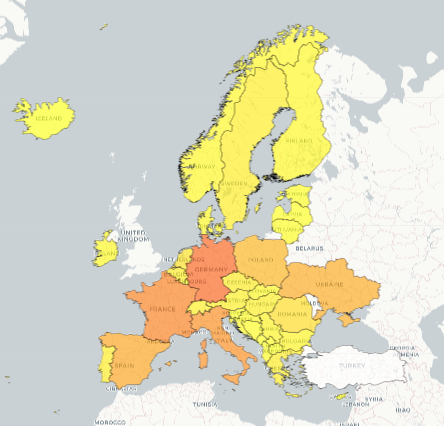

Cal tenir en compte els següents aspectes:

* Turquia apareix inicialment al GeoJSON com a país de la UE, però prèviament no hem extret informació sobre ell. **No cal que aparegui representat ni colorejat** (com es veu al codi, s’exclou del GeoJSON).

* La resta de països **sí que apareixen colorejats**. A Branca, el mapa de color va d’un color groc (menor població) a un vermell intens (major població).

* **Hem de ser capaços d’assignar a cada país un color acord amb la seva població**. Es valorarà positivament que s’analitzi el GeoJSON i es trobi una manera de fer correspondre cada “feature” del GeoJSON amb els països que hem extret, amb l’objectiu d’afegir-hi un color corresponent a la seva població.

* A més, al passar el cursor per sobre d’un país, ha de mostrar-se un tooltip amb el seu nom (en l’idioma original del país), codi i **nombre d’habitants**, tal com es veu en la captura amb Alemanya.


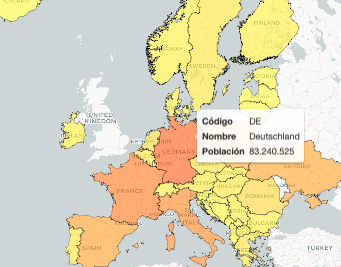

### **Solució**


## **Apartat 3 - Anàlisi obert amb l’API del Banc Mundial (World Bank)** (3/25 ptos)

### **Objectiu**

En aquest exercici faràs un **anàlisi obert de dades econòmiques** utilitzant l’**API del Banc Mundial**.
Hauràs de **seleccionar un o més indicadors econòmics** (per exemple, PIB per càpita, taxa d’atur, inflació, emissions de CO₂, despesa educativa, etc.), **extreure les dades mitjançant l’API** i **representar-les visualment** de manera clara i significativa.

L’objectiu és que exploris pel teu compte el potencial de les APIs obertes per a l’obtenció i anàlisi de dades reals.

---

### **Tasques**

1. **Selecciona un indicador econòmic** del teu interès i consulta el seu codi a la documentació de l’API.
2. **Obtén les dades** per API d’aquest indicador per a diversos països (o una regió) i per a un rang temporal significatiu.
3. **Processa i analitza els resultats**, filtrant, agrupant o comparant segons el teu criteri.
4. **Representa visualment la informació**, triant el tipus de gràfic o mapa més adient.
5. Un breu informe de conclusions, on **explicis breument** el teu enfocament: quines dades has triat, quines preguntes volies respondre i quines conclusions observes (**extensió màxima: 15 línies**).

---

### **Recursos i documentació**

Per explorar l’API i les seves possibilitats, consulta la documentació oficial del Banc Mundial.

> **Important:** assegura’t d’utilitzar la **versió 2 de l’API (v2)** en totes les teves peticions.
> L’endpoint base ha de començar amb:
> `https://api.worldbank.org/v2/`

* **Guia general de l’API d’indicadors**
  [https://datahelpdesk.worldbank.org/knowledgebase/articles/889392-about-the-indicators-api-documentation](https://datahelpdesk.worldbank.org/knowledgebase/articles/889392-about-the-indicators-api-documentation)

  Nota: Un indicador del Banc Mundial és una dada estadística que mesura un aspecte específic del desenvolupament econòmic, social o ambiental d’un país o regió.

* **Enllaç amb tots els indicadors**
  [https://data.worldbank.org/indicator?tab=all](https://data.worldbank.org/indicator?tab=all)

* **Estructura de crides, filtres i paràmetres (`per_page`, `date`, `mrv`, etc.)**
  [https://datahelpdesk.worldbank.org/knowledgebase/articles/898581-api-basic-call-structures](https://datahelpdesk.worldbank.org/knowledgebase/articles/898581-api-basic-call-structures)

* **Llistat de països i regions (codis ISO-2 i ISO-3)**
  [https://datahelpdesk.worldbank.org/knowledgebase/articles/898590-country-api-queries](https://datahelpdesk.worldbank.org/knowledgebase/articles/898590-country-api-queries)
  [https://data.worldbank.org/country](https://data.worldbank.org/country)

* **Consulta d’indicadors i fonts de dades**
  [https://datahelpdesk.worldbank.org/knowledgebase/articles/898599-indicator-api-queries](https://datahelpdesk.worldbank.org/knowledgebase/articles/898599-indicator-api-queries)

---

### **Criteris d’avaluació**

* Correcció tècnica en la consulta i maneig de l’API.
* Tractament i anàlisi adequat de les dades.
* Qualitat i claredat de la visualització.
* Capacitat d’interpretació i comunicació de resultats.
* Capacitat de síntesi en les explicacions.
